## Problem Statement

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


In [1]:
#Import EDA libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import plot_likert

In [2]:
dump=pd.read_excel('D:/Krsna/Internship/13-10-2022/customer_retention_dataset.xlsx', sheet_name=None)

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
dump.keys()

dict_keys(['datasheet', 'codedsheet'])

In [5]:
data=dump['datasheet']
data_codes=dump['codedsheet']
data_utilitarian_oldname=data.iloc[:,17:47]  #This step is clearly explained after 5 steps, this is for seperating hedontic values
data_hedontic_oldname=data.iloc[:,47:] #This step is for getting names for better understanding

In [6]:
data.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [7]:
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [7]:
# Renaming the columns for better understanding

#Renaming column names
rename_columns = ['Gender','Age','Shopping_City','PinCode','Shopping_Since','Shopping_Frequency_1year','Internet_Access',
                  'Device_Used','Screen_Size','Operating_System', 'Browser_Used','Channel_FirstUsed','Login_Mode',
                  'TimeSpent_ForPurchase','Payment_Mode','Abandon_Frequency','Abandon_Reason','Content_Readability',
                  'Similar_ProductInfo','Seller_ProductInfo','ProductInfo_Clarity','Ease_Navigation',
                  'Loading_ProcessingSpeed','UserFriendly_Interface','Conveninet_PaymentMode','TimelyFulfilment_Trust',
                  'Customer_Empathy','CustPrivacy_Guarantee','VariousChannel_Responses','Benefit_Discount',
                  'Enjoy_OnlineShopping','Convenience_Flexibility','Returns_ReplacementPolicy','Loyalty_ProgramAccess',
                  'QualityInfo_Satisfaction','WebsiteQuality_Satisfaction','NetBenefit_Satisfaction','User_Trust',
                  'Product_SeveralCategory','Relevant_ProductInfo','Monetary_Savings','Patronizing_Convenience',
                  'Adventure_Sense','Enhances_SocialStatus','Gratification_Shopping','Role_Fulfilment','Money_Worthy',
                  'Shopped_From','Easy_WebApp','Visually_AppealingWebApp','Product_Variety','Complete_ProductInfo',
                  'Fast_WebApp','Reliable_WebApp','Quick_Purchase','PaymentOptions_Availability','Fast_Delivery',
                  'CustInfo_Privacy','FinancialInfo_Security','Perceived_Trustworthiness','MultiChannel_Assistance',
                  'Long_LoginTime','LongPhoto_DisplayTime','LatePrice_Declare','Long_LoadingTime','Limited_PaymentMode',
                  'Late_Delivery','ChangeWebApp_Design','Page_Disruption','WebApp_Efficiency','Recommendation']

data.columns = rename_columns

In [85]:
data.head()

,Gender,Age,Shopping_City,PinCode,Shopping_Since,Shopping_Frequency_1year,Internet_Access,Device_Used,Screen_Size,Operating_System,Browser_Used,Channel_FirstUsed,Login_Mode,TimeSpent_ForPurchase,Payment_Mode,Abandon_Frequency,Abandon_Reason,Content_Readability,Similar_ProductInfo,Seller_ProductInfo,ProductInfo_Clarity,Ease_Navigation,Loading_ProcessingSpeed,UserFriendly_Interface,Conveninet_PaymentMode,TimelyFulfilment_Trust,Customer_Empathy,CustPrivacy_Guarantee,VariousChannel_Responses,Benefit_Discount,Enjoy_OnlineShopping,Convenience_Flexibility,Returns_ReplacementPolicy,Loyalty_ProgramAccess,QualityInfo_Satisfaction,WebsiteQuality_Satisfaction,NetBenefit_Satisfaction,User_Trust,Product_SeveralCategory,Relevant_ProductInfo,Monetary_Savings,Patronizing_Convenience,Adventure_Sense,Enhances_SocialStatus,Gratification_Shopping,Role_Fulfilment,Money_Worthy,Shopped_From,Easy_WebApp,Visually_AppealingWebApp,Product_Variety,Complete_ProductInfo,Fast_WebApp,Reliable_WebApp,Quick_Purchase,PaymentOptions_Availability,Fast_Delivery,CustInfo_Privacy,FinancialInfo_Security,Perceived_Trustworthiness,MultiChannel_Assistance,Long_LoginTime,LongPhoto_DisplayTime,LatePrice_Declare,Long_LoadingTime,Limited_PaymentMode,Late_Delivery,ChangeWebApp_Design,Page_Disruption,WebApp_Efficiency,Recommendation
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Promo code not applicable,Strongly agree (5),Agree (4),Agree (4),Agree (4),Agree (4),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree

### Descriptive Statistics

In [8]:
for i in data.columns:
    print("Description for column ",i," is : \n", data[i].describe())
    print("\n Value of unique columns is : \n ", data[i].value_counts())
    print("****" * 30)

Description for column  Gender  is : 
 count        269
unique         2
top       Female
freq         181
Name: Gender, dtype: object

 Value of unique columns is : 
  Female    181
Male       88
Name: Gender, dtype: int64
************************************************************************************************************************
Description for column  Age  is : 
 count             269
unique              5
top       31-40 years
freq               81
Name: Age, dtype: object

 Value of unique columns is : 
  31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
************************************************************************************************************************
Description for column  Shopping_City  is : 
 count       269
unique       11
top       Delhi
freq         58
Name: Shopping_City, dtype: object

 Value of unique columns is : 
  Delhi            58
Gre

> Inferences from descriptive analysis :
    
* Column pincode can be removed as city option is already available from survey.
* All the columns except pincode are categorical in nature with maximum of 8 unique values. It is clearely understood that
  being a survey all the features are categorical in nature.
* Till column number 47 only a single value is present in each row , as from survey only one option was allowed to select



Columns grouping: 

Demographic-
* Column 0-17 can more be seen as demographic details like Gender , Age grouping, device used, time explored on website ,
   abandoning the product in cart etc these can be categorised as a set of data.
   * These set of columns provide information about the group of people using the websites, segmentation can be understood,
     Product targeting, mode of advertisement, time spent for purchases etc  inferences can be drawn

Utilitarian-
* Column 18-46 are more related to survey of the factors/utilities which customers agree or disagree over a scale of five
  factors Agree, strongly agree , disagree etc.
  * Exploring and analysing these columns gives insights to all the ecommerce websites to improve the customer experience
    on certain parameters

Hedontic-
* From column 48 it can be observed that each row has multiple values as it might probably be checkbox option as the text
  of values is uniform and predefined.
  * These values can further split and grouped against the column header which is question
  * These columns primarily are the questions to customers asking details about fast delivery, multiple payment options 
    availability, customer information privacy, financial info security, multichannel assitance and many more and getting
    reply on which websites, customers think have these features.
  * Exploring and Analysing these columns will give insights about liking or rating of customers towards different 
    ecommerce sites. Ecommerce sites that customers are more inclined towards with reasons for such inclination.
  * ecommerce sites which are low rated can understand the factors 
  
  
* Due to high number of columns, more details inferences can only be done after segregating datasets and using different
  visualisation to understand the data.

In [9]:
# Dividing the dataset into three categories demographic, Utilitarian and Hedontic 
#hedontic is already segregated initially before renaming.

data_demographic=data.iloc[:,:17]
data_utilitarian_newname=data.iloc[:,17:47]
data_hedontic=data.iloc[:,47:]

In [10]:
#removing column pincode
data_demographic.drop(columns=["PinCode"],inplace=True)

#### Checking for nulls

In [11]:
print("No of nulls in demographic details are : ",data_demographic.isnull().sum().sum())
print("No of nulls in Utilitarian details are : ",data_utilitarian_newname.isnull().sum().sum())
print("No of nulls in hedontic details are : ",data_hedontic.isnull().sum().sum())

No of nulls in demographic details are :  0
No of nulls in Utilitarian details are :  0
No of nulls in hedontic details are :  0


In [12]:
# Updating and replacing row values to avoid duplicate
data_demographic['Internet_Access']=data_demographic['Internet_Access'].replace('Mobile internet','Mobile Internet')

### Univariate Analysis 

In [13]:
# Defining functions for different plots to be used subsequently

def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

def generate_countplot(j):
    plt.figure(figsize=(15,5))
    sns.countplot(y=data_utilitarian_newname[j])
    plt.xticks(rotation=75)
    plt.title(j)
    plt.ylabel(None)
    return plt.show()

def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

Pie plot for the column: Gender
Female    181
Male       88
Name: Gender, dtype: int64


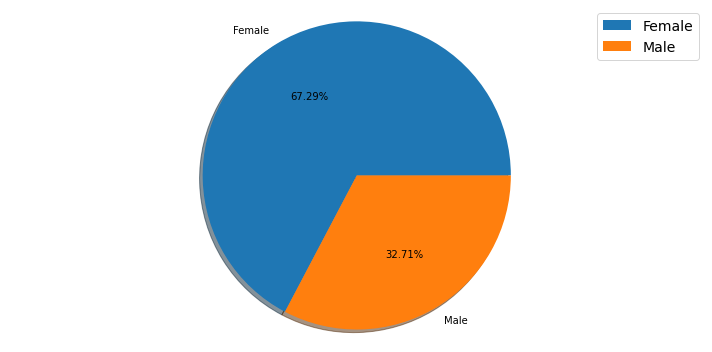

*********************************************************************************************************
Pie plot for the column: Age
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


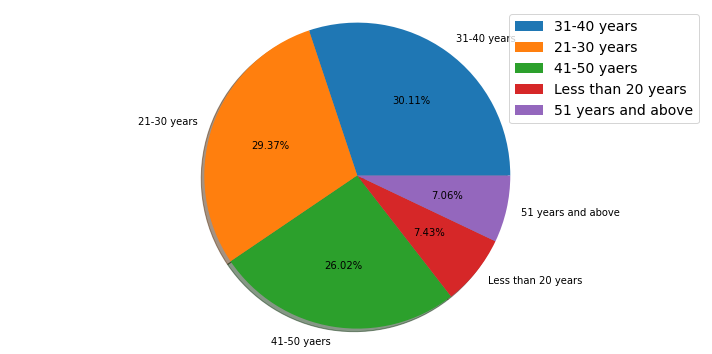

*********************************************************************************************************
Pie plot for the column: Shopping_City
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Shopping_City, dtype: int64


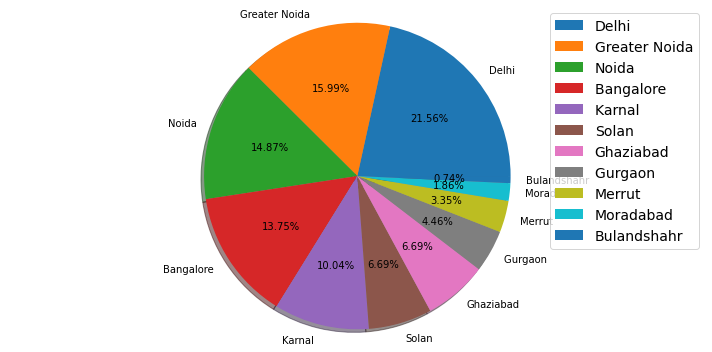

*********************************************************************************************************
Pie plot for the column: Shopping_Since
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Shopping_Since, dtype: int64


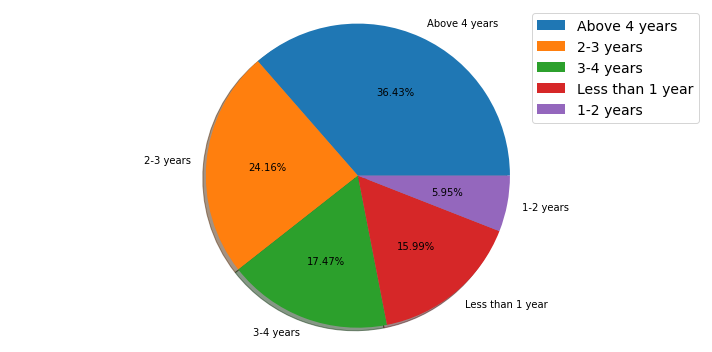

*********************************************************************************************************
Pie plot for the column: Shopping_Frequency_1year
Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: Shopping_Frequency_1year, dtype: int64


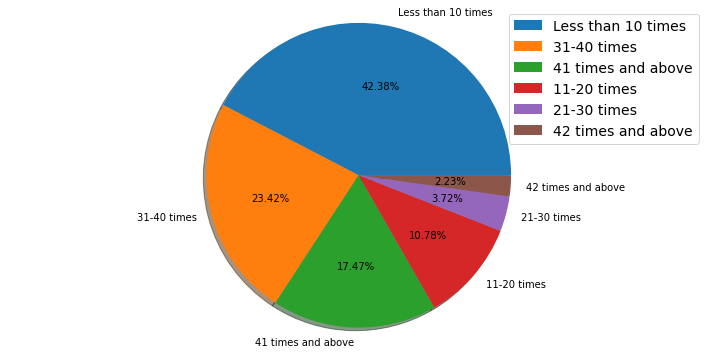

*********************************************************************************************************
Pie plot for the column: Internet_Access
Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: Internet_Access, dtype: int64


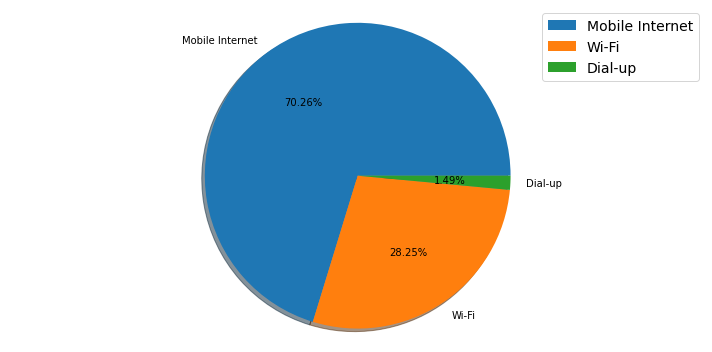

*********************************************************************************************************
Pie plot for the column: Device_Used
Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Device_Used, dtype: int64


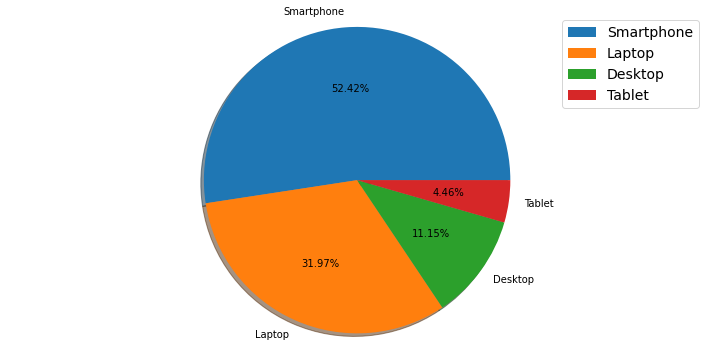

*********************************************************************************************************
Pie plot for the column: Screen_Size
Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: Screen_Size, dtype: int64


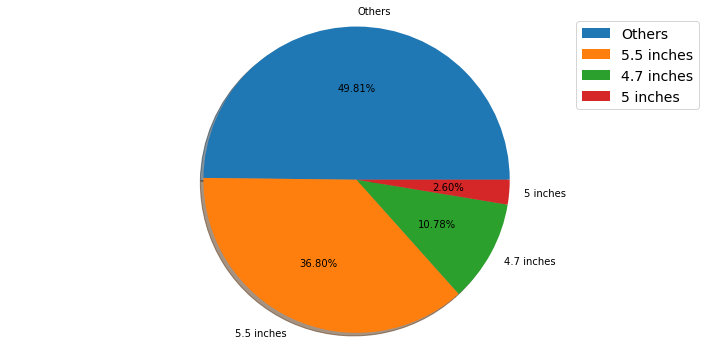

*********************************************************************************************************
Pie plot for the column: Operating_System
Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: Operating_System, dtype: int64


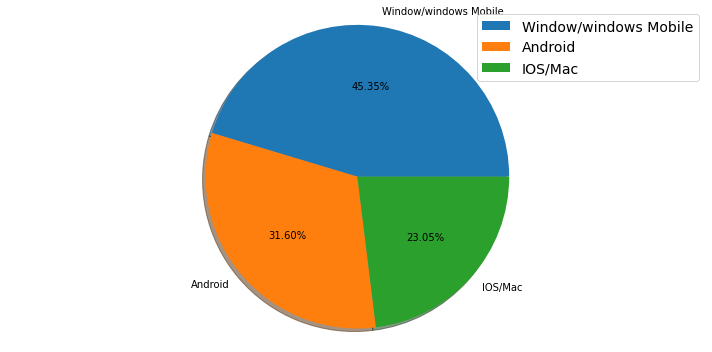

*********************************************************************************************************
Pie plot for the column: Browser_Used
Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: Browser_Used, dtype: int64


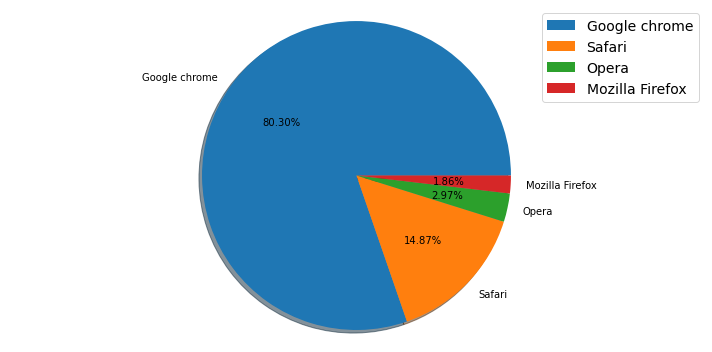

*********************************************************************************************************
Pie plot for the column: Channel_FirstUsed
Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Channel_FirstUsed, dtype: int64


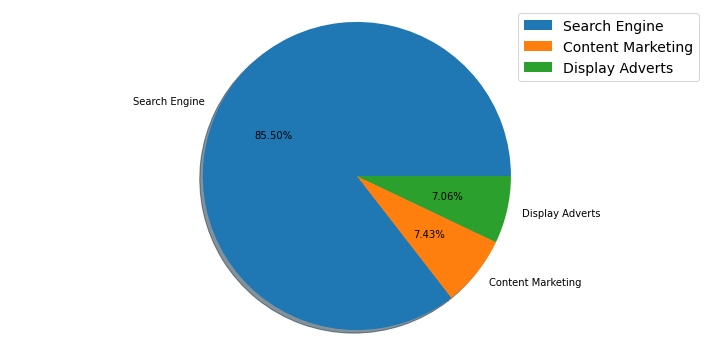

*********************************************************************************************************
Pie plot for the column: Login_Mode
Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: Login_Mode, dtype: int64


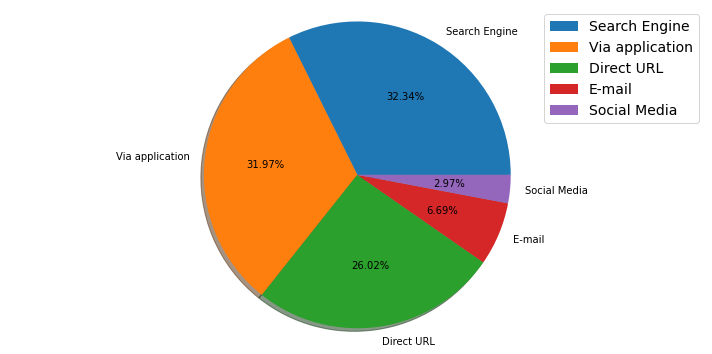

*********************************************************************************************************
Pie plot for the column: TimeSpent_ForPurchase
more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: TimeSpent_ForPurchase, dtype: int64


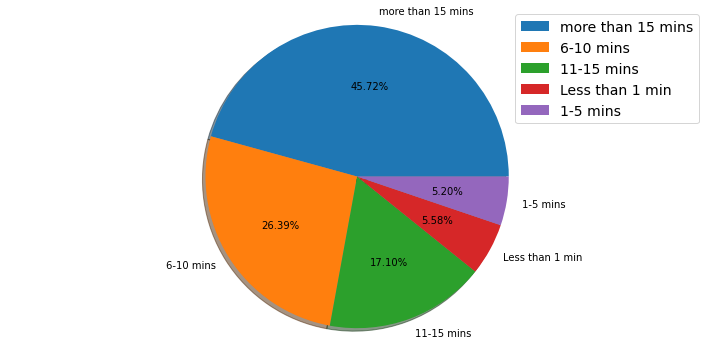

*********************************************************************************************************
Pie plot for the column: Payment_Mode
Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Payment_Mode, dtype: int64


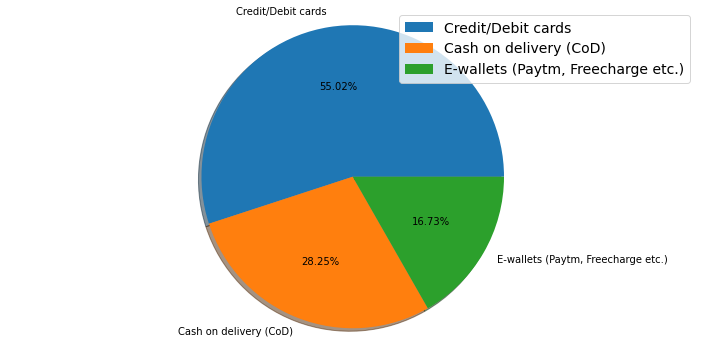

*********************************************************************************************************
Pie plot for the column: Abandon_Frequency
Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: Abandon_Frequency, dtype: int64


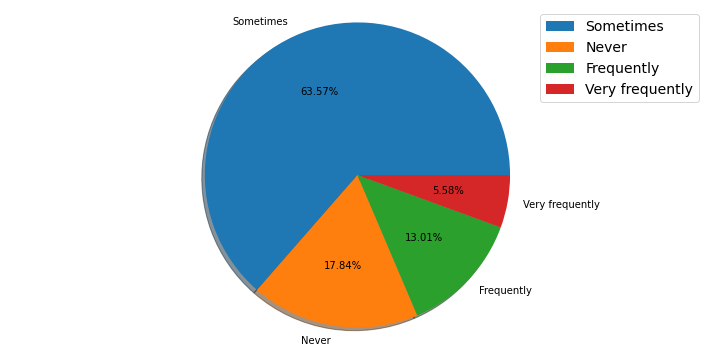

*********************************************************************************************************
Pie plot for the column: Abandon_Reason
Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Abandon_Reason, dtype: int64


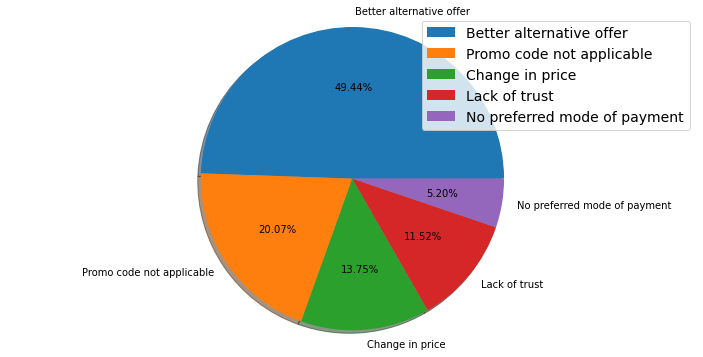

*********************************************************************************************************


In [17]:
# Visualizing demographic details with pie plot

for j in data_demographic.columns:
    print(f"Pie plot for the column:", j)
    print(data_demographic[j].value_counts())
    generate_pie(data_demographic[j])
    print("***"*35)

#### Inferences from demographic detail analysis

> Gender :
* No of Female participated in survey with 67.29% is almost more than twice the percentage of Male participation at 32.71%
* Female tend to use ecommerce sites more in comparision to men

> Age:
* The large chunk of customers using ecommerce platforms for shopping falls in age between 21-40 with age bins 31-40 years 
  occupying 30.11% and 21-30 years 29.37%
* It is interesting to see age group 41-50 years occupying 26.02% of total customer base which is very much near in compa-
  rision to above age groups.
* Age groups less than 20 and greater than 51 occupy the least usage of ecommerce and it is normal considering the age and
  access to digital platforms
  
> Shopping City:
* The survey doesnt seem to cover major cities of India.
* Within the data provided , the distribution of major customers is from major metropoliton areas like Delhi, Bengaluru and
  Noida, with more than 52% of entire customers shop from Delhi and Noida together.

> Shopping Since:
* 36.43% of customers have claimed to have shopped online for more than 4 years now , 17.47% are using ecommerce for 4years
  and 24.16% have been shopping online for 3 years now.
  * This is a very healthy trend as combinedly around around 78% of customers have been shopping of average 3 years and 
    more and are well habituated using online mode for purchases.
* Analysis would have been more holistic if a survey point on customers who never used platforms would have been added.

> Purchases made in past 1 year:
* 42.38% have made less than 10 purchases online in last one year and 10.78% doing purchase for 11-20 times total being 
  53.16% made less than 20 purchases in past one year.
  * This may reflect that half of customer base use online sites for occasional purchases and not the regular monthly 
    requirement like groceries etc.
* Around 46.84% made purchases online for  more than 30 times in year which implies these users access platforms for all
  types of purchases and can be termed regular users.
  
> Internet Access :
* Mobile Internet is the clear winner in terms of preferred medium for using the eCommerce sites, this is clearly due to 
  extensive availability of 4G/LTE services, anywhere access and most affordable way of connecting to web.
  
> Device_Used :
* Smartphone form the major way for accessing the eCommerce sites with 52.42% of device used share, followed by laptop with
  31.97% . Least mode of accessing is Tablet which is 4.46% .
  
> Screen Size:
* 36.80% prefer the mobile with larger screen size of 5.5 inches and more.
* around 49.81% surveyed it as others which is unclear, this others might possibly be laptop/tablet or desktop screen sizes
  which is not mentioned in list of survey.

> Operating System:
* Distribution of OS seems almost equal with 45.35% using windows platform and rest Android and iOS mobile ecosystem 
  combinedly form 54.65% . 
  * This is also almost inline with device used as smartphones formed approximately 52% of total devices.
  
> Channel used for first login:
* It is surprising to have noted almost 85.50% of customers first accessed these ecommerce sites by using search engines 
  and directly entering the site than access it through advertisements.
  * It can also be inferred that online advertisements of ecommerce sites are very low and other modes of advertisement 
    seem to work for ecommerce.
    
> Login Mode:
* 32.34% use search engine for accessing website, 31.97% use the application built for mobile and 26.02% directly enter the
  URL and access the websites.
  * It can be observed that even though more than half prefer mobile as their medium for accessing the websites, contrary 
    application built for mobile is not preferred way and instead customers prefer to use search engine or direct URL.
    
> Time Spent for purchase:
* Majority of the customers spend more than 15 mins for purchases made online

> Payment Mode:
* Card mode of payment occupies the major payment mode used by customers with 55.02% of total. Cash on Delivery comes 
  second at 28.25%.
* e-wallets like paytm,freecharge etc occupy only 16.73% of payment mode share. on comparision this is very low as from 
  above it can be observed mobile forms the highest medium for accessing the sites. Necessary analysis of ways ahead can be
  done to increase the foothold in e wallet segment.
  
> Abandon Frequency:
* 63% of the customer base abandon the product added to cart sometimes due to multiple reasons

> Abandon_Reason:
* 49% abandon the cart due to better alternative offers available in other sites, 20% abandon the cart as promo codes are 
  not applicable. 
* Very less percentage of customer base (5.20%) abandon the cart on grounds of non availability of preferred payment mode. 


### Multivariate Analysis

* Analysing multiple columns and drawing insights

In [26]:
# Updating the data with necessary row modifications for unique values
data=data.replace('Dis-agree (2)','Disagree (2)')
data=data.replace('indifferent  (3)','Indifferent (3)')
data=data.replace('indifferent (3)','Indifferent (3)')
data=data.replace('Mobile internet','Mobile Internet')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


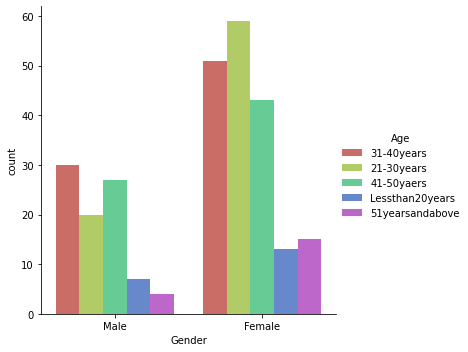

In [31]:
# Analysing the data of Gender and Age
sns.factorplot('Gender',kind='count',data=data,hue='Age',palette='hls')
plt.show()

> Inference:

* Female is the gender who prefer online shopping and among Female age group 21-30 years forms the major category of age
   group shopping online. this is followed by age group 31-40years.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


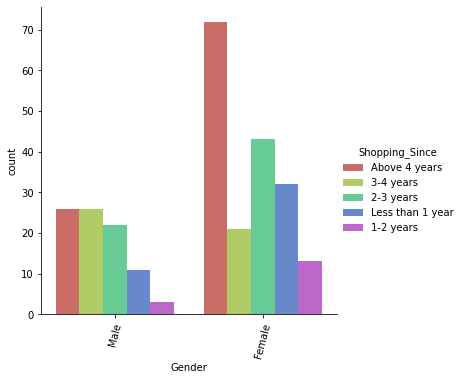

In [36]:
#Shopping since vs age
sns.factorplot('Gender',kind='count',data=data,hue='Shopping_Since',palette='hls')
plt.xticks(rotation=75)
plt.show()

> Inference:
* Among the females , the survey reveals that the habit of online shopping is more than 4 yearsand well established

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


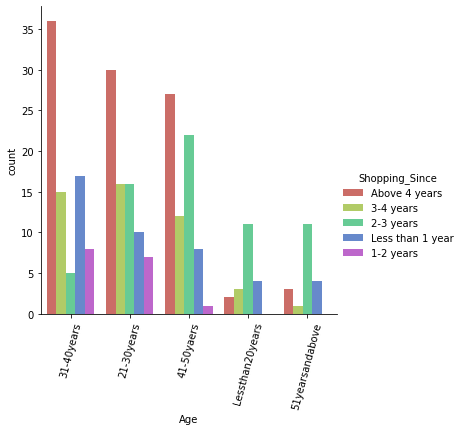

In [37]:
#Shopping since vs age
sns.factorplot('Age',kind='count',data=data,hue='Shopping_Since',palette='hls')
plt.xticks(rotation=75)
plt.show()

> Inference:
* The regular shopper using online platform for more than 4 years fall under the age bin 31-40years, followed by 21-30years

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


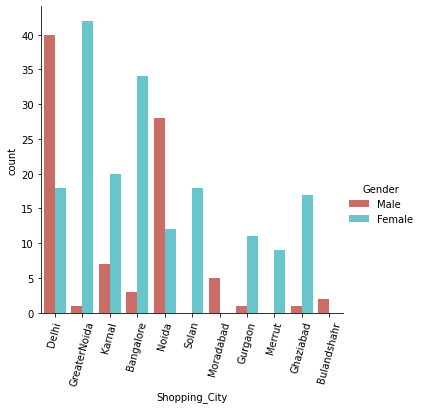

In [41]:
#Shopping City vs Gender
sns.factorplot('Shopping_City',kind='count',data=data,hue='Gender',palette='hls')
plt.xticks(rotation=75)
plt.show()

> Inference:
    
* Among shopping city vs gender analysis
  * Males have very skewed distribution with large concerntration only ini Delhi and Noida, rest of cities surveyed have 
    very meagre count 
  * Female shoppers distribution is almost seen in all cities with Greater Noida topping the chart followed by Bangalore.  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


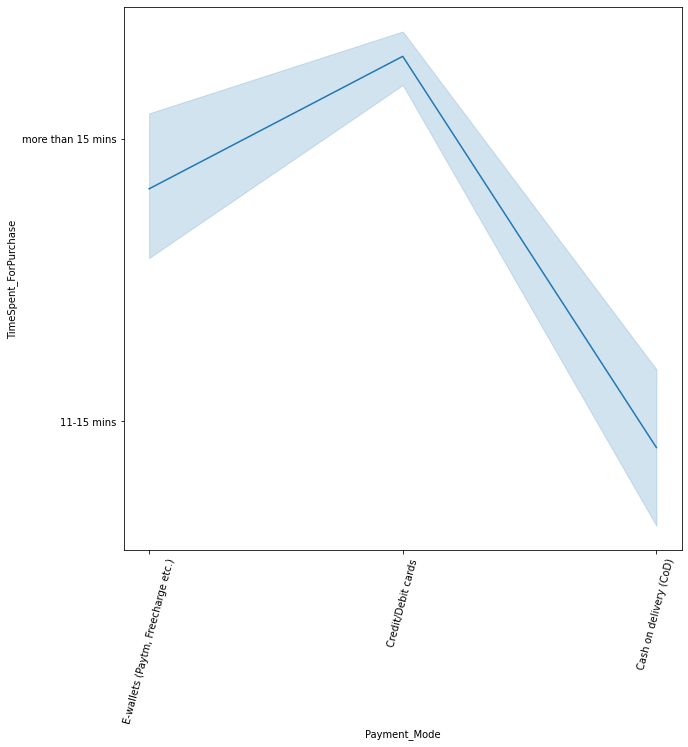

In [53]:
# Payment mode vs time spent for purchase

plt.figure(figsize=(10,10))
sns.lineplot(data["Payment_Mode"],data["TimeSpent_ForPurchase"])
plt.xticks(rotation=75)
plt.show()

> Inference:
* Many customers feel Time taken for completing the purchase transaction is very low in "Cash on Delivery (COD)" mode of
  transaction
* Credits cards/ Debit cards take high time in terms of completing the transaction as OTP and other details are to be 
  provided

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


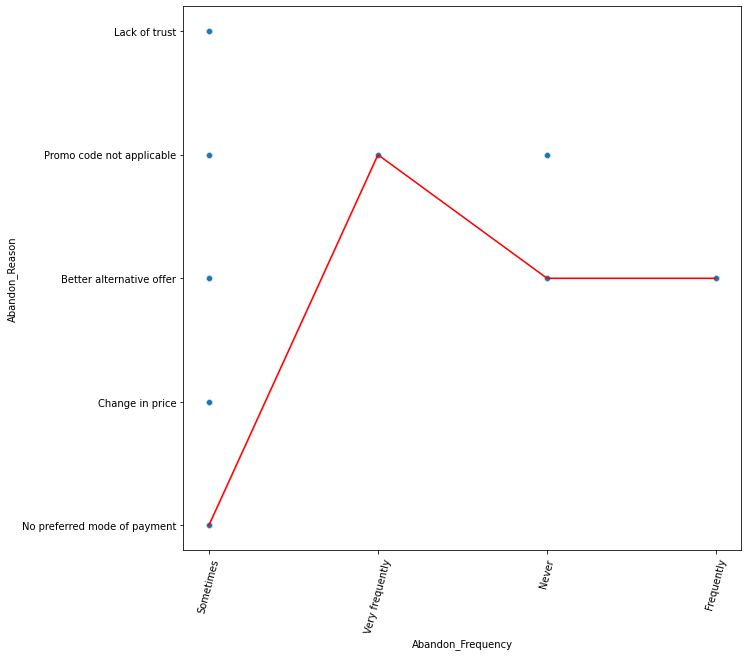

In [72]:
#Abandon Frequency vs Abandon Reason

plt.figure(figsize=(10,10))
sns.scatterplot(data["Abandon_Frequency"],data["Abandon_Reason"])
sns.lineplot(data["Abandon_Frequency"],data["Abandon_Reason"],estimator='max', color='red')
plt.xticks(rotation=75)
plt.show()

> Inference:
    
* From survey it can be inferred that the customers after adding item to card abandon it Frequently only due to 
  availability of better alternative
* Customers some times abandon the item added in card due to multiple reasons like No preferred payment, change in price
  better alternative offer, non availability of promo code and lack of trust

#### Visualising utilitarian details with count plot

Count plot for the column: Content_Readability
Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: Content_Readability, dtype: int64


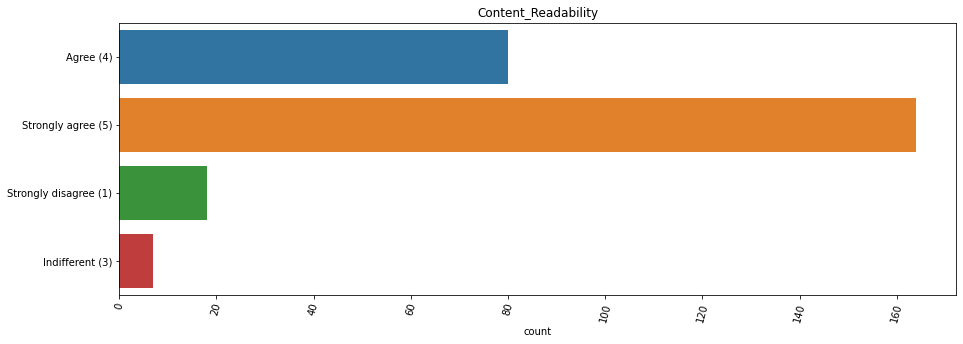

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Similar_ProductInfo
Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Disagree (2)           18
Name: Similar_ProductInfo, dtype: int64


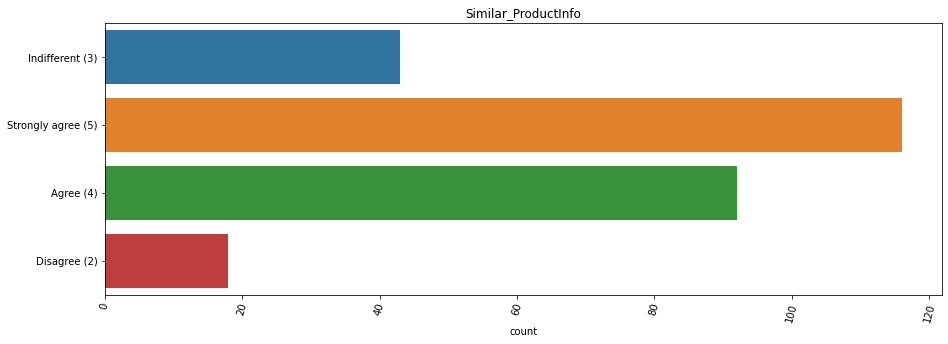

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Seller_ProductInfo
Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Disagree (2)              18
Strongly disagree (1)     11
Name: Seller_ProductInfo, dtype: int64


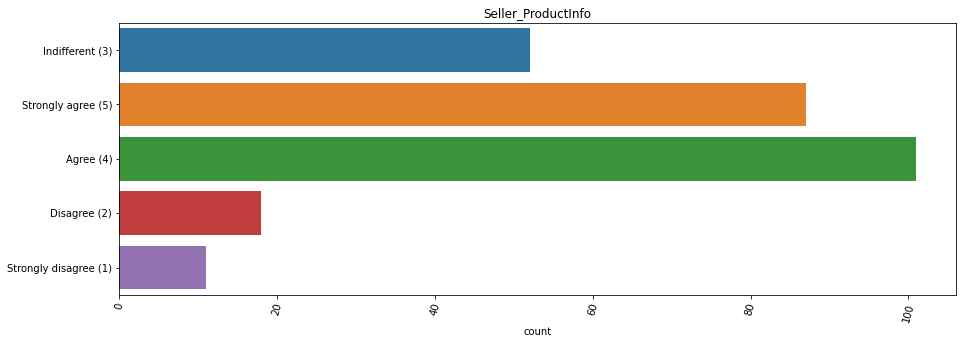

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: ProductInfo_Clarity
Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Disagree (2)              12
Name: ProductInfo_Clarity, dtype: int64


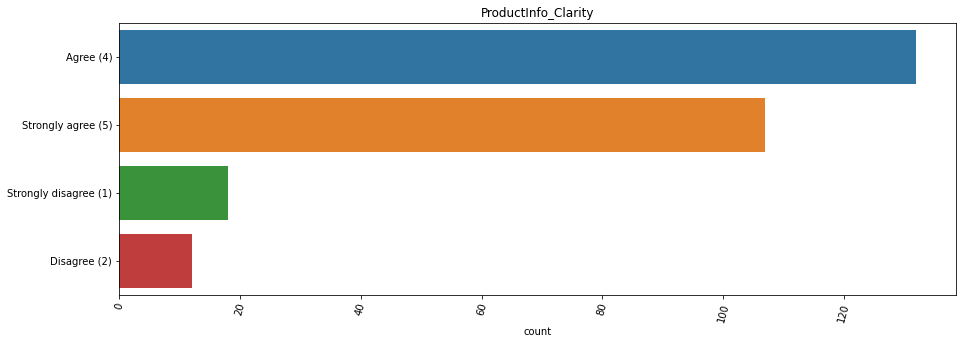

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Ease_Navigation
Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Disagree (2)               5
Name: Ease_Navigation, dtype: int64


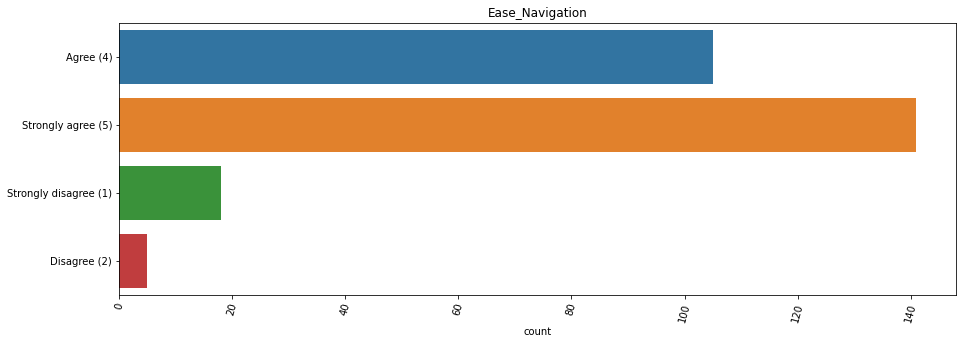

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Loading_ProcessingSpeed
Strongly agree (5)       115
Agree (4)                112
Disagree (2)              18
Strongly disagree (1)     12
Indifferent (3)           12
Name: Loading_ProcessingSpeed, dtype: int64


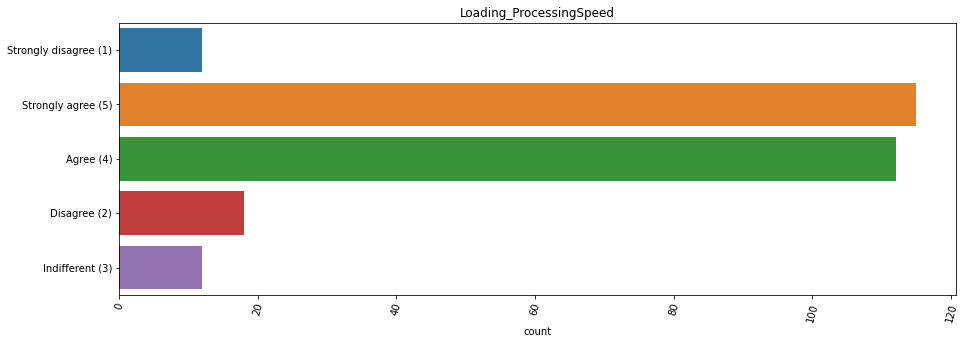

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: UserFriendly_Interface
Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Disagree (2)              12
Indifferent (3)            5
Name: UserFriendly_Interface, dtype: int64


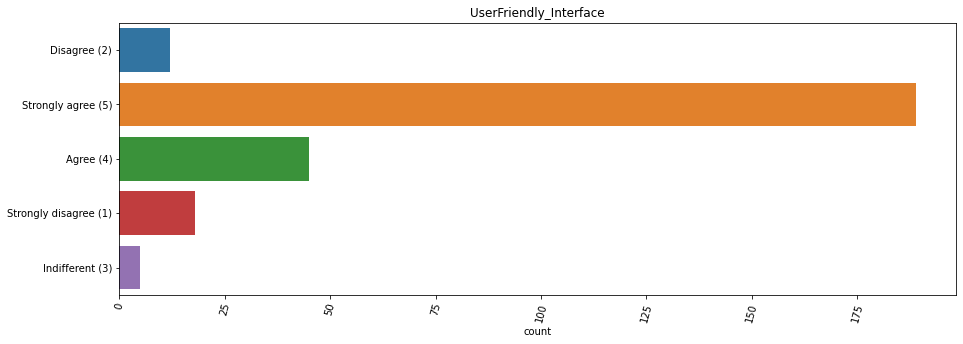

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Conveninet_PaymentMode
Strongly agree (5)    159
Agree (4)              80
Disagree (2)           30
Name: Conveninet_PaymentMode, dtype: int64


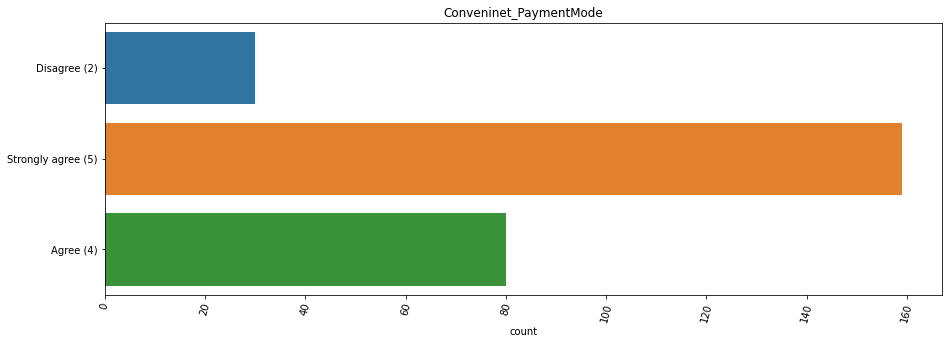

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: TimelyFulfilment_Trust
Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
Indifferent (3)        12
Name: TimelyFulfilment_Trust, dtype: int64


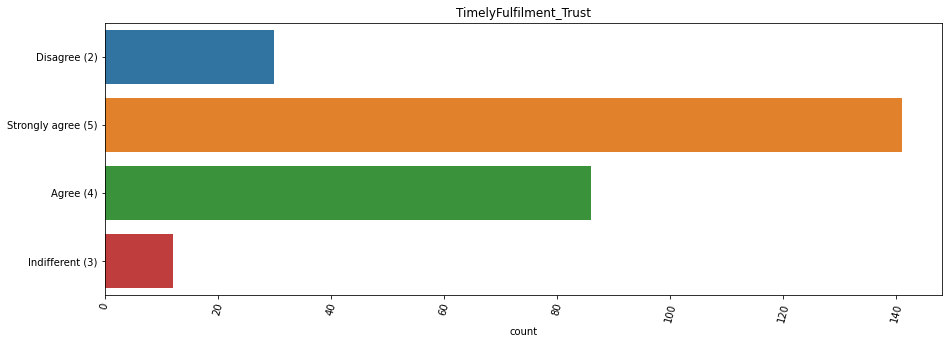

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Customer_Empathy
Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
Indifferent (3)           15
Name: Customer_Empathy, dtype: int64


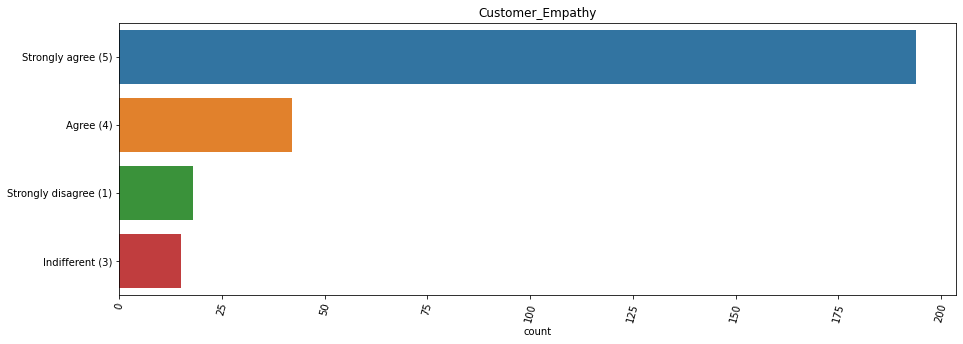

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: CustPrivacy_Guarantee
Strongly agree (5)    185
Agree (4)              58
Indifferent (3)        26
Name: CustPrivacy_Guarantee, dtype: int64


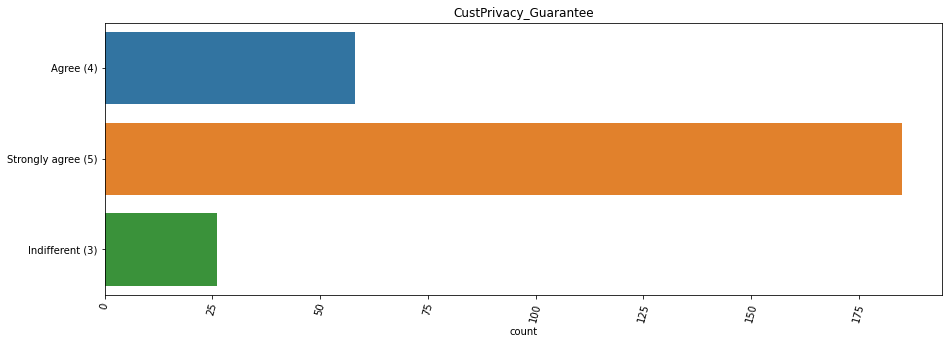

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: VariousChannel_Responses
Strongly agree (5)       149
Agree (4)                 94
Indifferent (3)           15
Strongly disagree (1)     11
Name: VariousChannel_Responses, dtype: int64


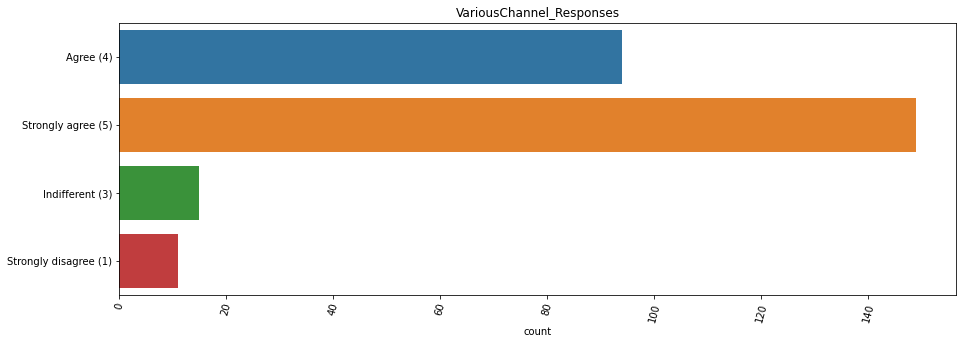

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Benefit_Discount
Strongly agree (5)       105
Agree (4)                 85
Indifferent (3)           50
Strongly disagree (1)     18
Disagree (2)              11
Name: Benefit_Discount, dtype: int64


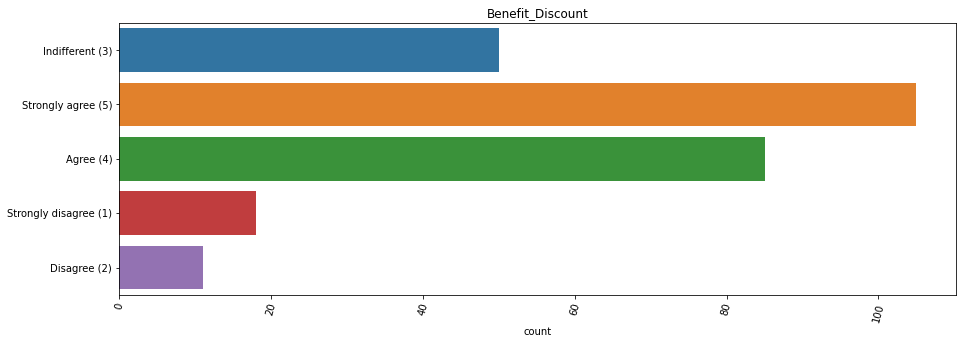

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Enjoy_OnlineShopping
Strongly agree (5)       86
Indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Disagree (2)             19
Name: Enjoy_OnlineShopping, dtype: int64


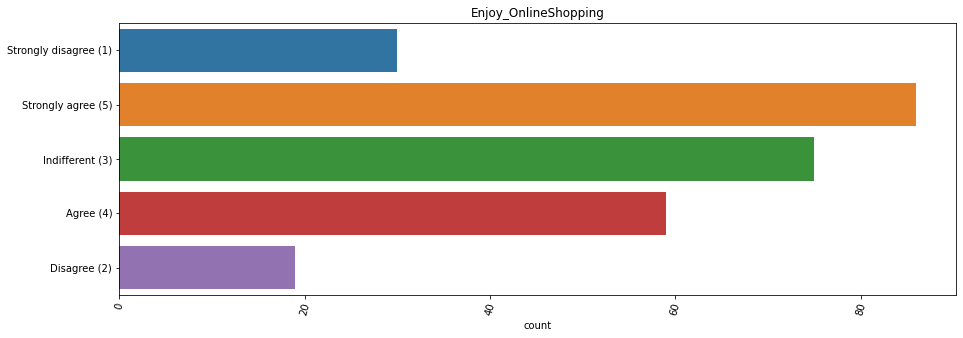

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Convenience_Flexibility
Strongly agree (5)    146
Agree (4)              78
Indifferent (3)        33
Disagree (2)           12
Name: Convenience_Flexibility, dtype: int64


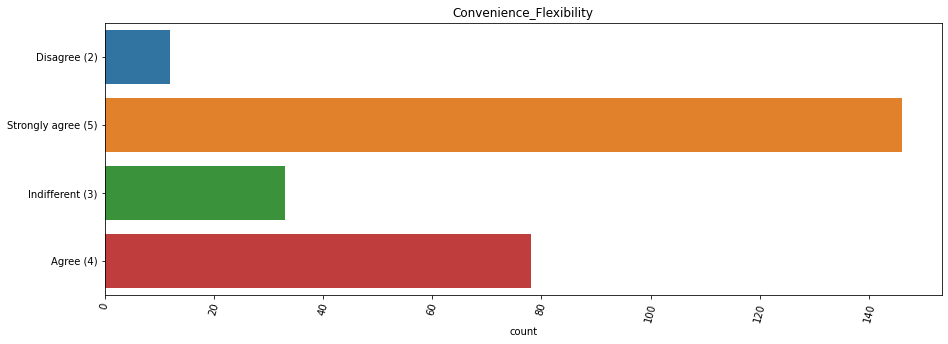

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Returns_ReplacementPolicy
Strongly agree (5)    198
Agree (4)              51
Disagree (2)           20
Name: Returns_ReplacementPolicy, dtype: int64


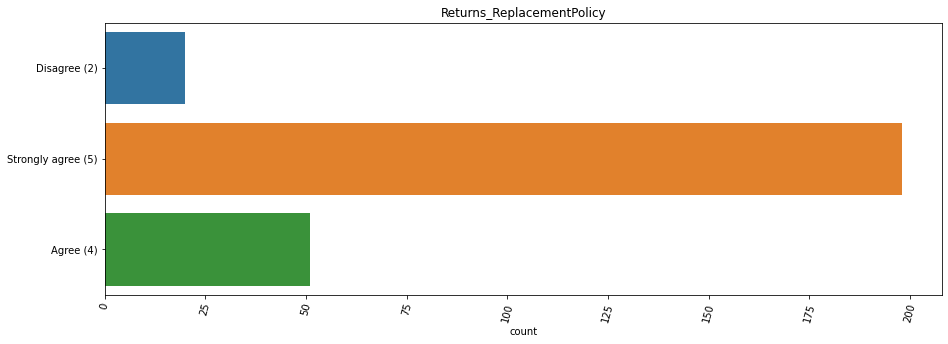

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Loyalty_ProgramAccess
Strongly agree (5)       115
Agree (4)                 64
Indifferent (3)           64
Disagree (2)              15
Strongly disagree (1)     11
Name: Loyalty_ProgramAccess, dtype: int64


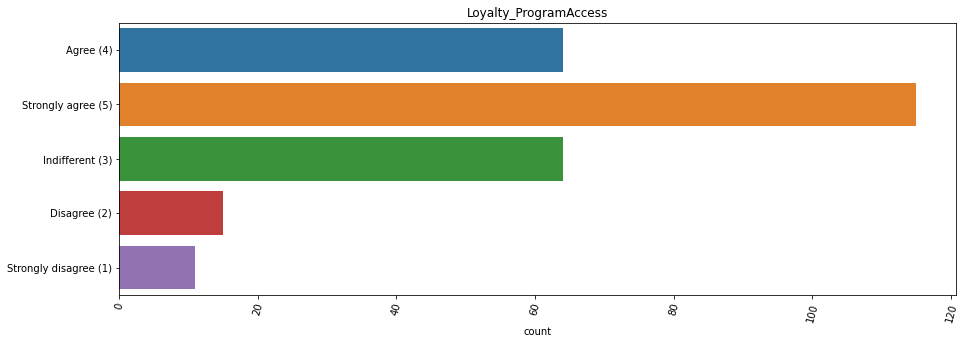

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: QualityInfo_Satisfaction
Strongly agree (5)    133
Agree (4)              80
Indifferent (3)        56
Name: QualityInfo_Satisfaction, dtype: int64


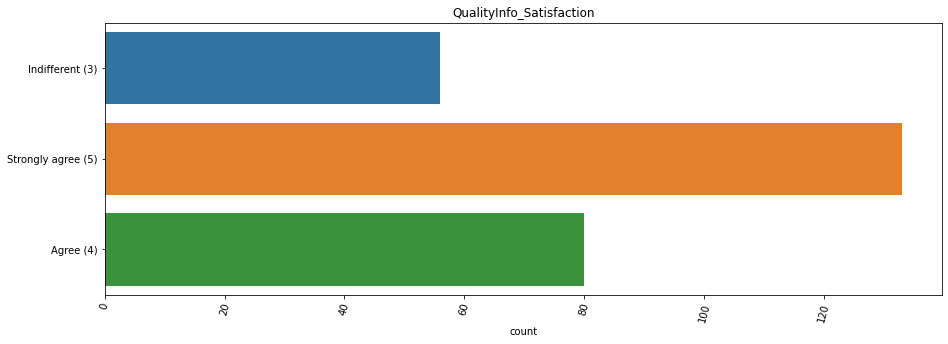

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: WebsiteQuality_Satisfaction
Strongly agree (5)    175
Agree (4)              86
Disagree (2)            8
Name: WebsiteQuality_Satisfaction, dtype: int64


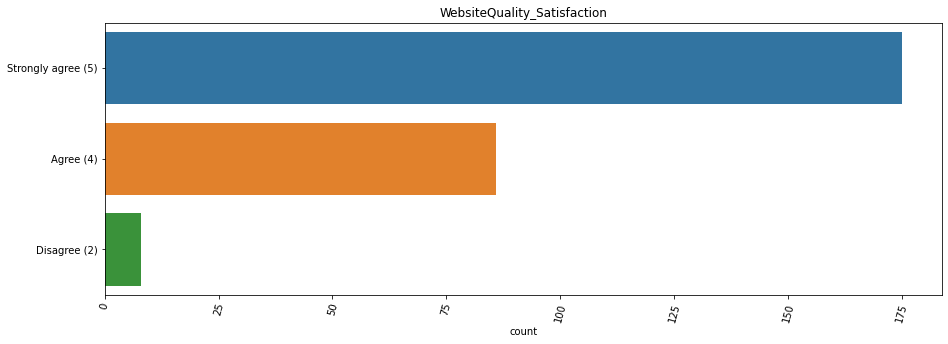

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: NetBenefit_Satisfaction
Strongly agree (5)    164
Agree (4)              54
Indifferent (3)        40
Disagree (2)           11
Name: NetBenefit_Satisfaction, dtype: int64


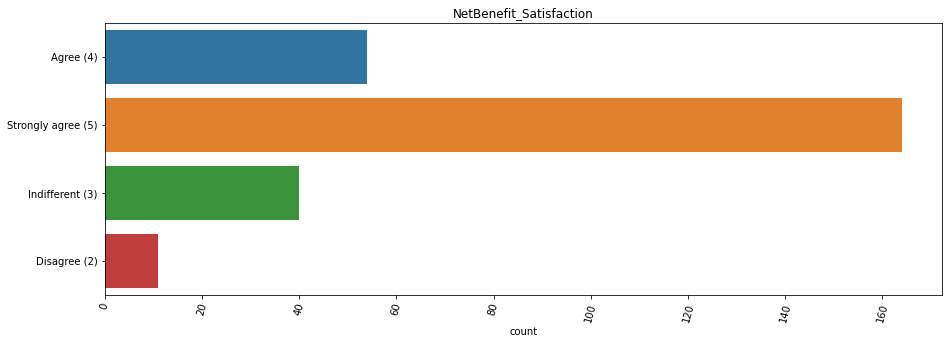

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: User_Trust
Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Disagree (2)               7
Indifferent (3)            5
Name: User_Trust, dtype: int64


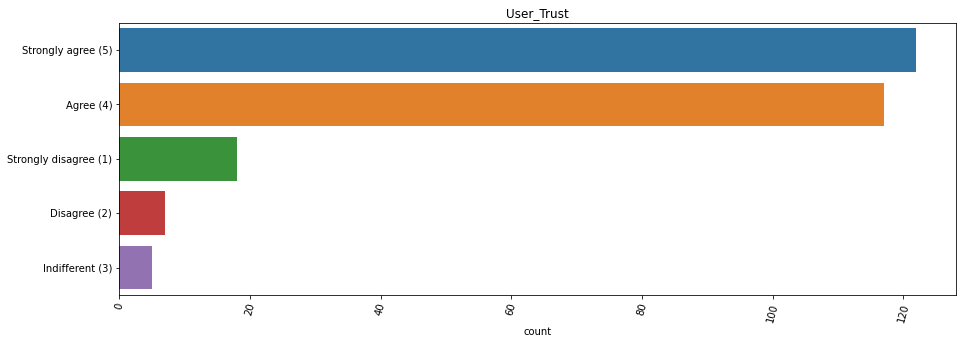

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Product_SeveralCategory
Strongly agree (5)    111
Agree (4)              94
Indifferent (3)        57
Disagree (2)            7
Name: Product_SeveralCategory, dtype: int64


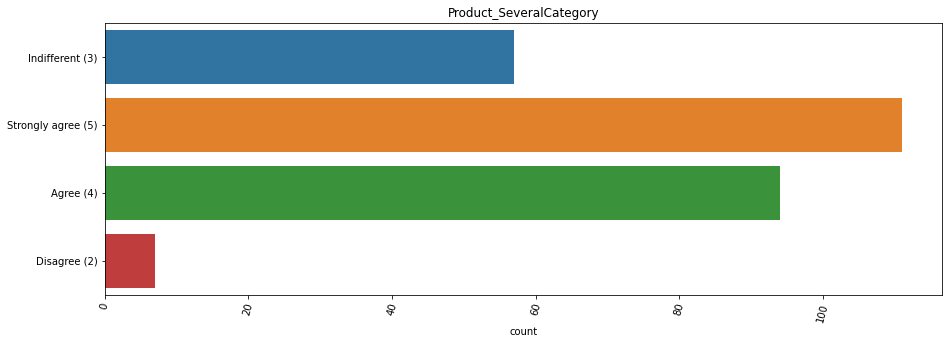

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Relevant_ProductInfo
Strongly agree (5)    135
Agree (4)              98
Indifferent (3)        31
Disagree (2)            5
Name: Relevant_ProductInfo, dtype: int64


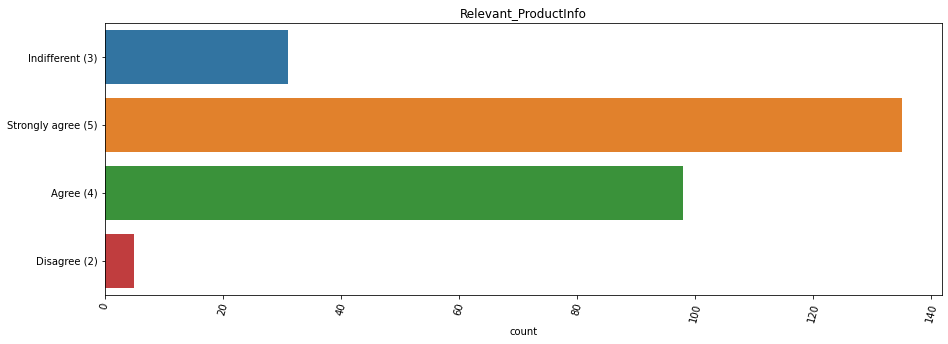

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Monetary_Savings
Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
Indifferent (3)        15
Name: Monetary_Savings, dtype: int64


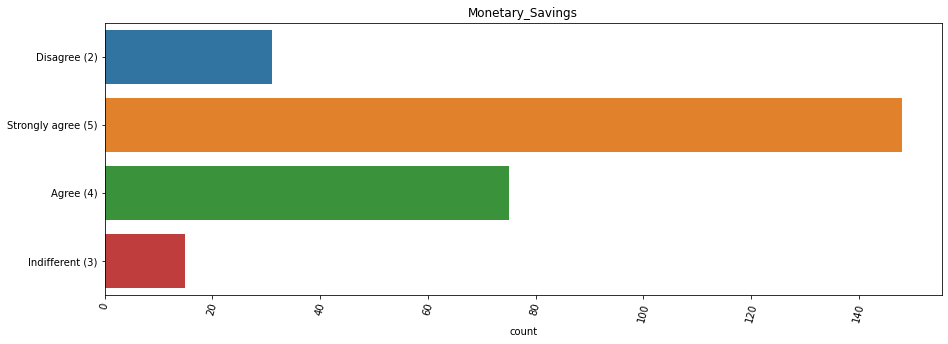

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Patronizing_Convenience
Agree (4)             138
Indifferent (3)        77
Strongly agree (5)     54
Name: Patronizing_Convenience, dtype: int64


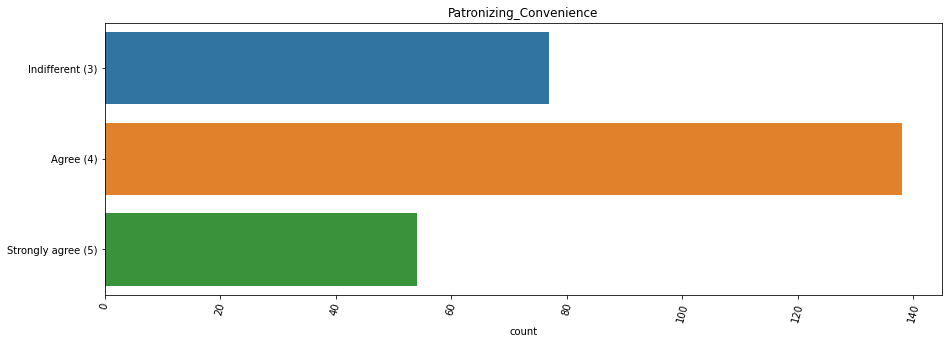

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Adventure_Sense
Agree (4)                101
Indifferent (3)           59
Strongly agree (5)        54
Disagree (2)              50
Strongly disagree (1)      5
Name: Adventure_Sense, dtype: int64


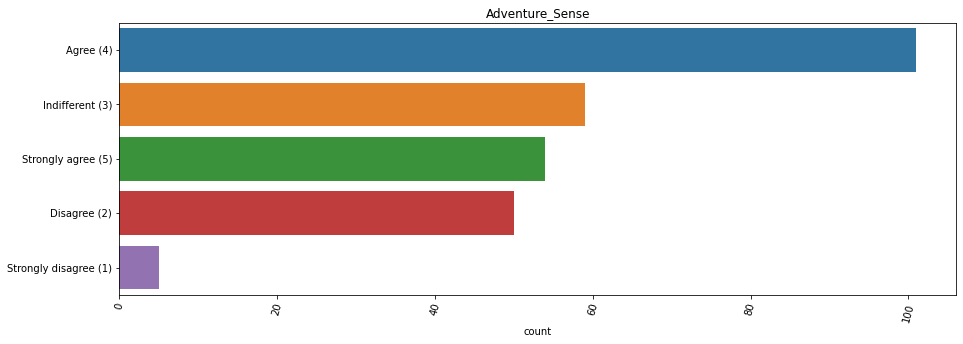

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Enhances_SocialStatus
Indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Disagree (2)              29
Name: Enhances_SocialStatus, dtype: int64


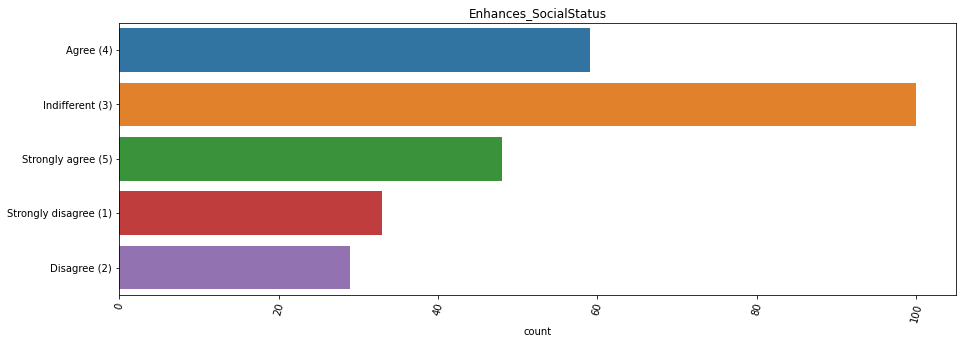

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Gratification_Shopping
Indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: Gratification_Shopping, dtype: int64


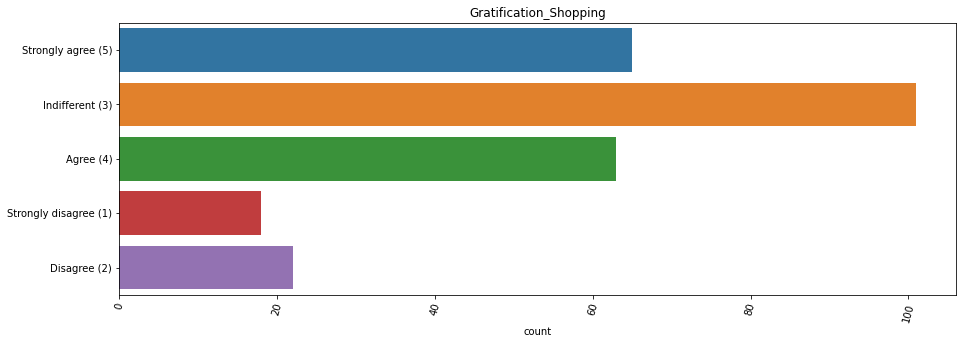

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Role_Fulfilment
Agree (4)                88
Indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Disagree (2)             22
Name: Role_Fulfilment, dtype: int64


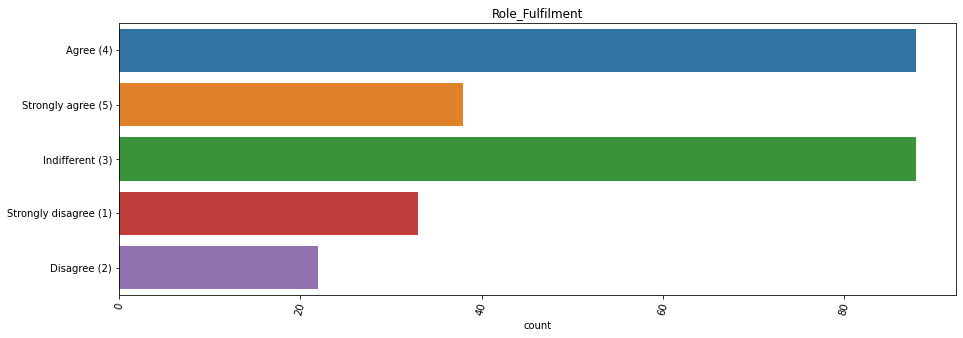

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Count plot for the column: Money_Worthy
Agree (4)             149
Strongly agree (5)     82
Indifferent (3)        38
Name: Money_Worthy, dtype: int64


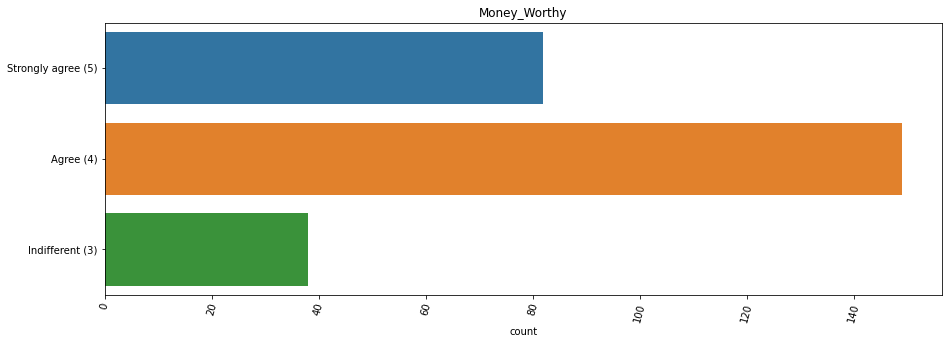

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************


In [101]:
for j in data_utilitarian_newname.columns:
    print(f"Count plot for the column:", j)
    print(data_utilitarian_newname[j].value_counts())
    index=0
    generate_countplot(j)
    plt.show()
    print("***"*41)
    print("***"*41)
    print("***"*41)

#### Visualising the utilitarian features with likert chart

<AxesSubplot:xlabel='Percentage of Responses'>

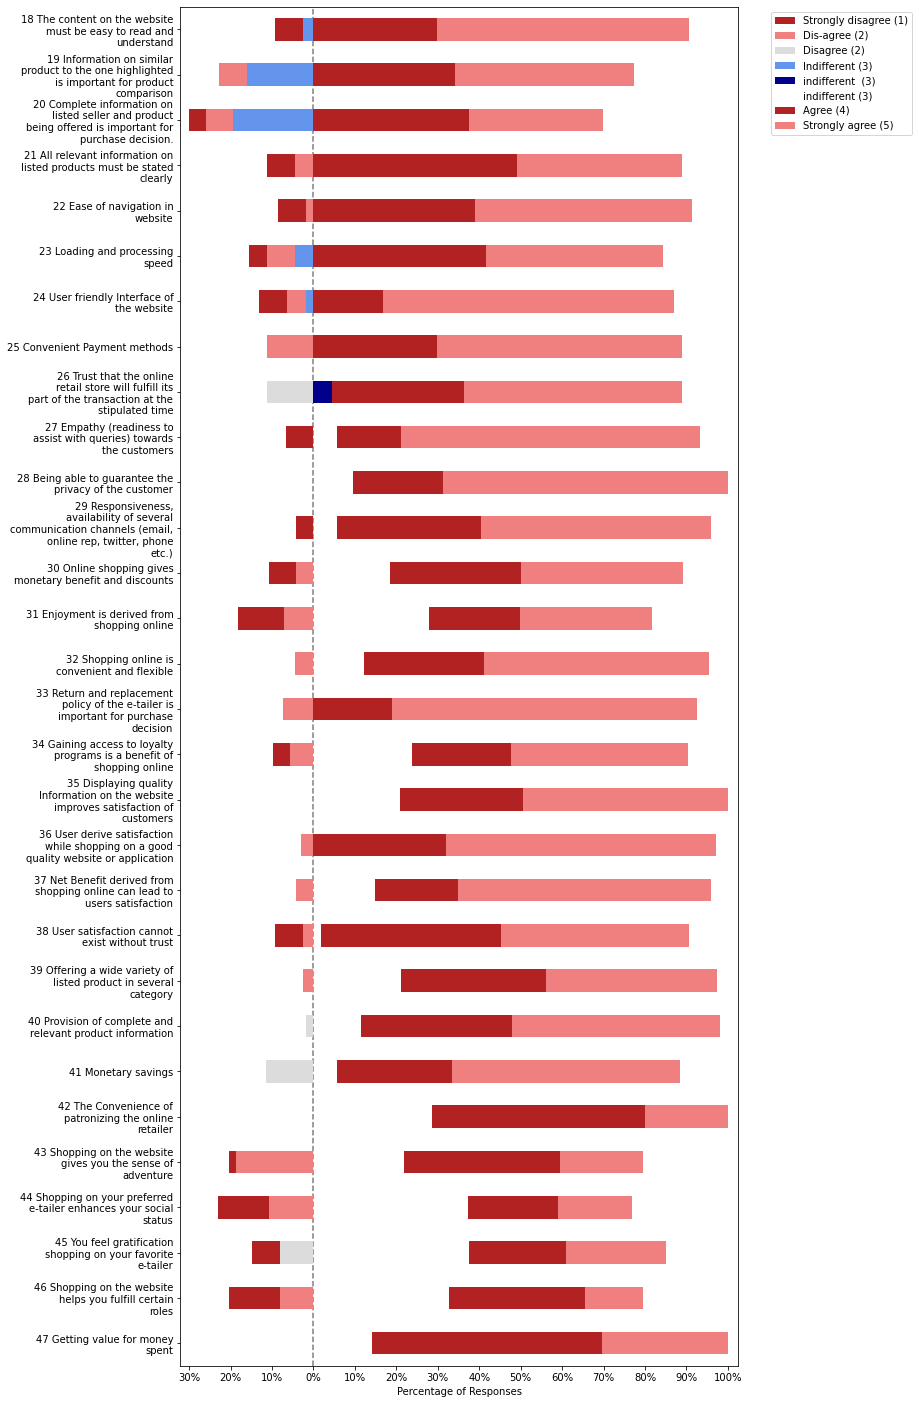

In [14]:
#defining the scale
scale=['Strongly disagree (1)','Dis-agree (2)','Disagree (2)','Indifferent (3)','indifferent  (3)','indifferent (3)','Agree (4)','Strongly agree (5)']

plot_likert.plot_likert(data_utilitarian_oldname, scale, plot_percentage=True,figsize=(10,25))

* It can be observed that there are multiple values with same meaning and making these surveys uniform

'Dis-agree (2)' ,'Disagree (2)'  -----> Disagree (2)

'Indifferent (3)','indifferent  (3)','indifferent (3)'  ------> 'Indifferent (3)'

In [15]:
data_utilitarian_oldname=data_utilitarian_oldname.replace('Dis-agree (2)','Disagree (2)')
data_utilitarian_oldname=data_utilitarian_oldname.replace('indifferent  (3)','Indifferent (3)')
data_utilitarian_oldname=data_utilitarian_oldname.replace('indifferent (3)','Indifferent (3)')

data_utilitarian_newname=data_utilitarian_newname.replace('Dis-agree (2)','Disagree (2)')
data_utilitarian_newname=data_utilitarian_newname.replace('indifferent  (3)','Indifferent (3)')
data_utilitarian_newname=data_utilitarian_newname.replace('indifferent (3)','Indifferent (3)')

<AxesSubplot:xlabel='Percentage of Responses'>

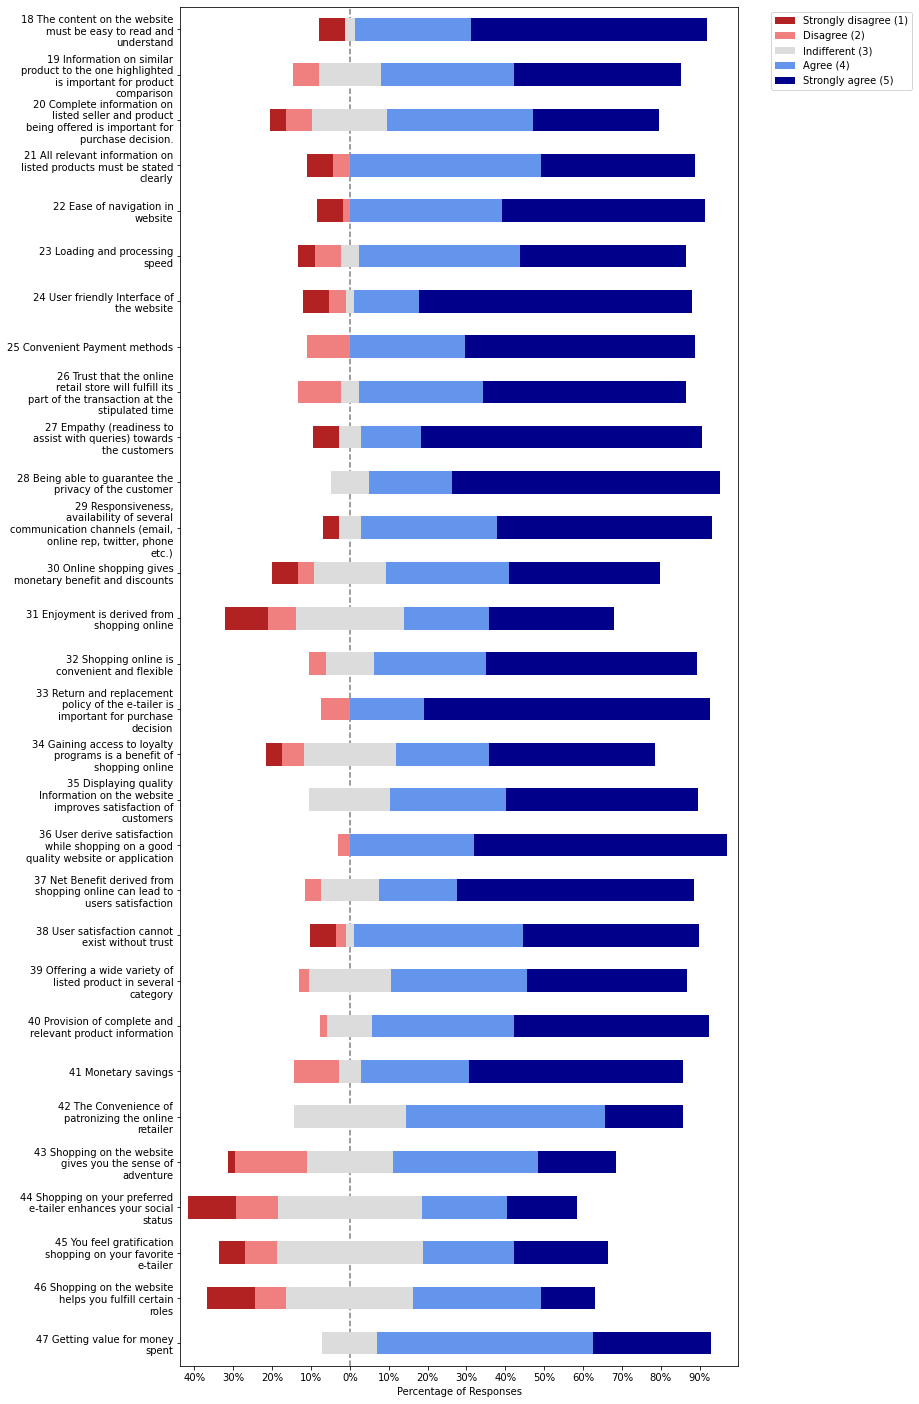

In [16]:
#defining the scale
scale=['Strongly disagree (1)','Disagree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)']

plot_likert.plot_likert(data_utilitarian_oldname, scale, plot_percentage=True,figsize=(10,25))

#### Inferences from analysing utilitarian values using likert chart

> Observations on the basis of Customer's choice:

* Customers mostly believe that the content on the website must be easy to read and understand

* People agree that information on similar product to the one highlighted is important for product comparison

* 70% people believe that Complete information on listed seller and product is important for purchase decision.

* 90% people believe that All relevant information on listed products must be stated clearly

* More than 90% of the people believe that the following parameters are important
  * Ease of navigation in website
  * Loading and processing speed
  * User friendly Interface of the website
  * Convenient Payment methods
  * Trust that the online retail store will fulfill its part of the transaction at the stipulated time
  * Empathy (readiness to assist with queries) towards the customers
  * Being able to guarantee the privacy of the customer
  * Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)
  * Online shopping gives monetary benefit and discounts
  * Getting value for money spent

* Around 70% people believe that Enjoyment is derived from shopping online

* 90% people believe that Shopping online is convenient and flexible

* More than 90% of the people believe that Return and replacement policy of the e-tailer is important for purchase decision

* Most of the people believe that Gaining access to loyalty programs is a benefit of shopping online

> Observations based on Satisfaction:

* Around 20% people don't agree that Displaying quality Information on the website improves satisfaction of customers. The other 80% agree that it is important.

* customers are in favour of "Strongly Agreement or Agree" for following :
  * User derive satisfaction while shopping on a good quality website or application
  * Net Benefit derived from shopping online can lead to users satisfaction
  * User satisfaction cannot exist without trust
  * Offering a wide variety of listed product in several category
  * Provision of complete and relevant product information
  * Monetary savings
  
* Other Hedontic feelings of customers :
  * People strongly believe: Shopping on the website gives you the sense of adventure, but we do have 10-30% who disagree
  * Around 60-80 % people believe that Shopping on your preferred e-tailer enhances your social status You feel     
    gratification shopping on your favorite e-tailer Shopping on the website helps you fulfill certain roles

#### Splitting the columns of hedontic values

In [17]:
# Updating the duplicates by removing the spaces for single value Eg: ' paytm.com','paytm.com'  --> paytm.com

for i in data_hedontic.columns:
    data_hedontic[i]=data_hedontic[i].str.replace(" ","")

Total Count of each unique values for survey  Shopped_From is : 
 Amazon.in       269
Paytm.com       150
Flipkart.com    221
Myntra.com      146
Snapdeal.com    182
dtype: int64


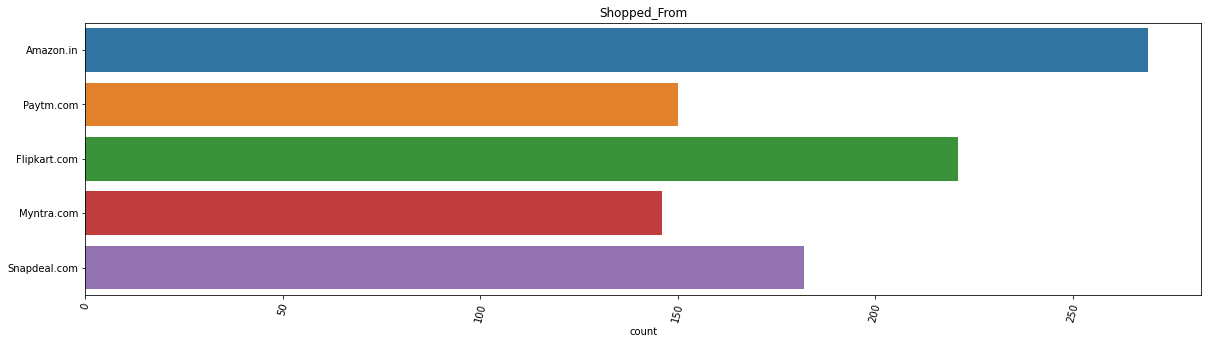

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Easy_WebApp is : 
 Paytm.com       125
Amazon.in       249
Flipkart.com    201
Myntra.com      147
Snapdeal.com    130
dtype: int64


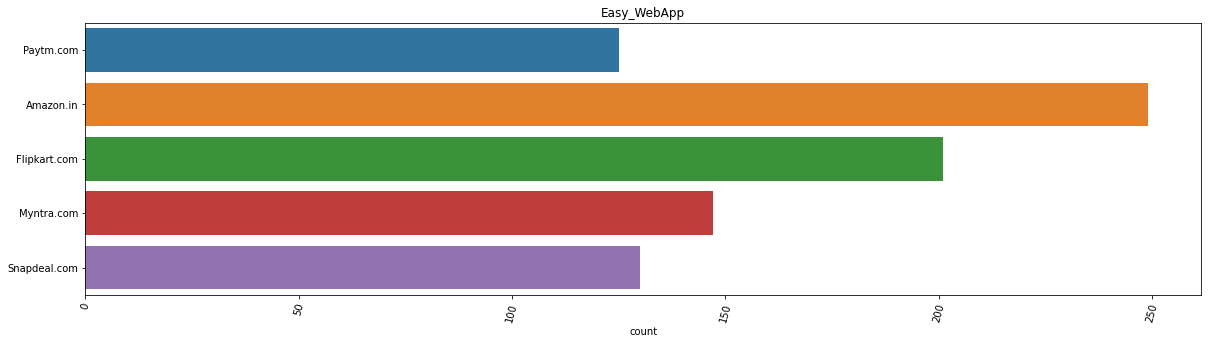

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Visually_AppealingWebApp is : 
 Flipkart.com    175
Amazon.in       227
Myntra.com      115
Paytm.com        67
Snapdeal.com     61
dtype: int64


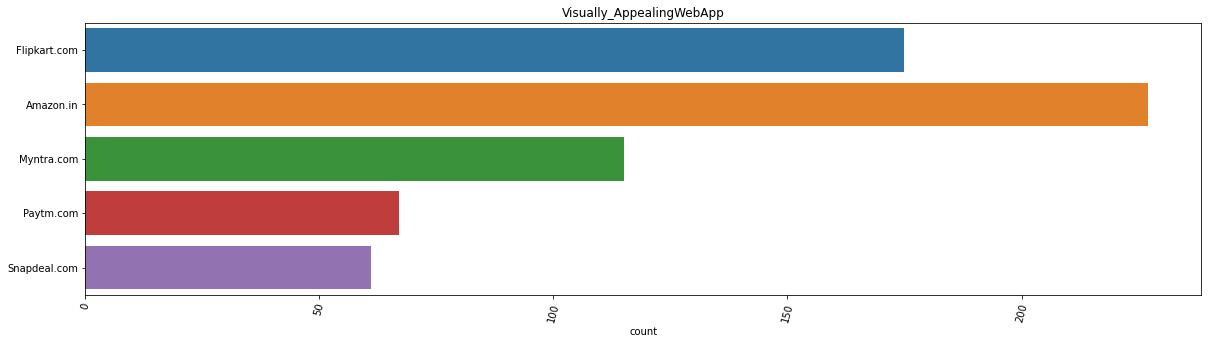

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Product_Variety is : 
 Flipkart.com    184
Myntra.com       64
Amazon.in       220
Paytm.com        20
Snapdeal.com     14
dtype: int64


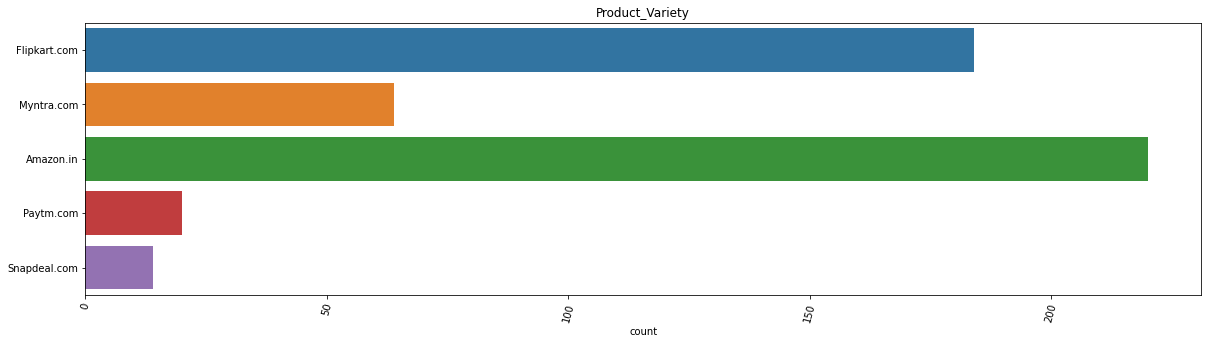

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Complete_ProductInfo is : 
 Snapdeal.com     59
Amazon.in       238
Flipkart.com    194
Myntra.com       64
Paytm.com        59
dtype: int64


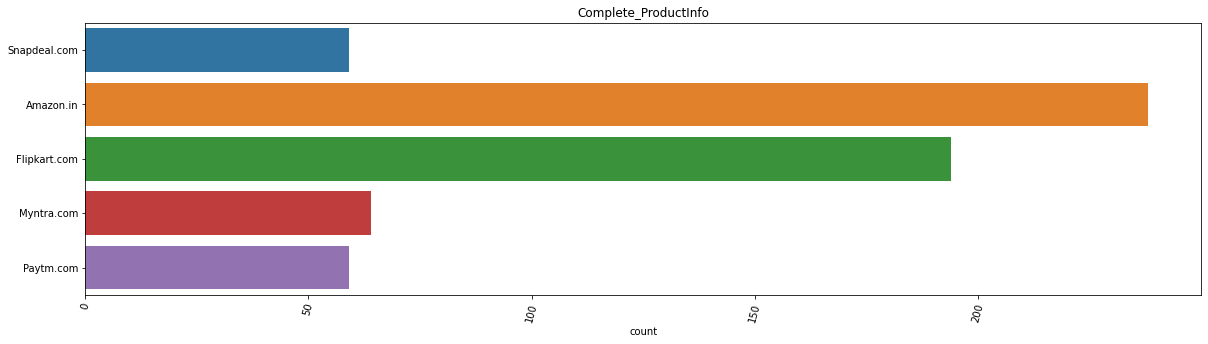

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Fast_WebApp is : 
 Snapdeal.com     81
Amazon.in       249
Flipkart.com    162
Myntra.com       74
Paytm.com        99
dtype: int64


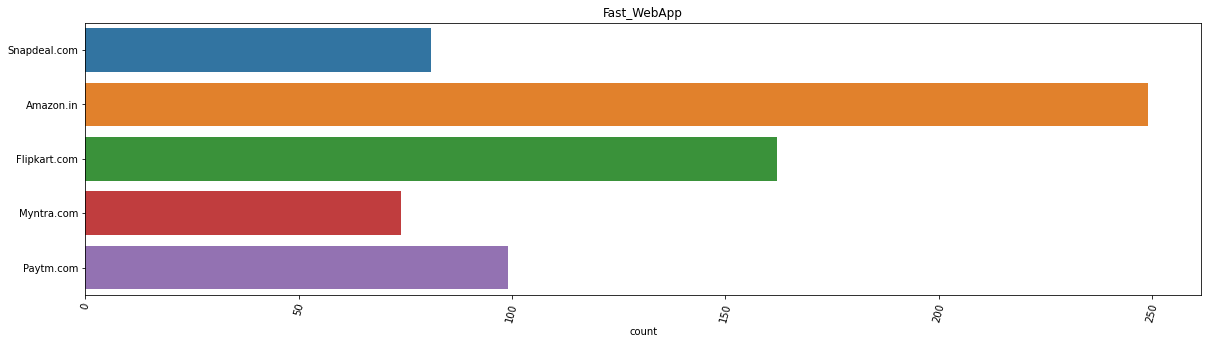

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Reliable_WebApp is : 
 Paytm.com        96
Myntra.com       64
Amazon.in       227
Flipkart.com    146
Snapdeal.com     45
dtype: int64


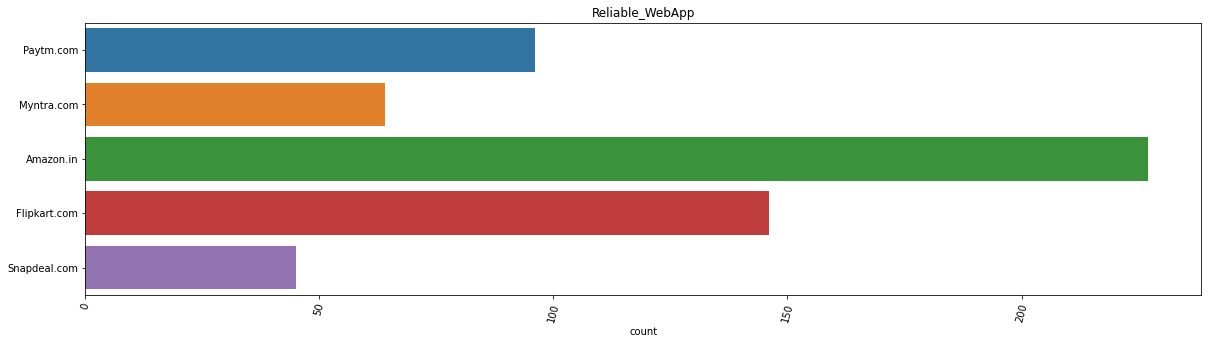

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Quick_Purchase is : 
 Paytm.com       107
Amazon.com      215
Flipkart.com    158
Myntra.com       79
Snapdeal         29
dtype: int64


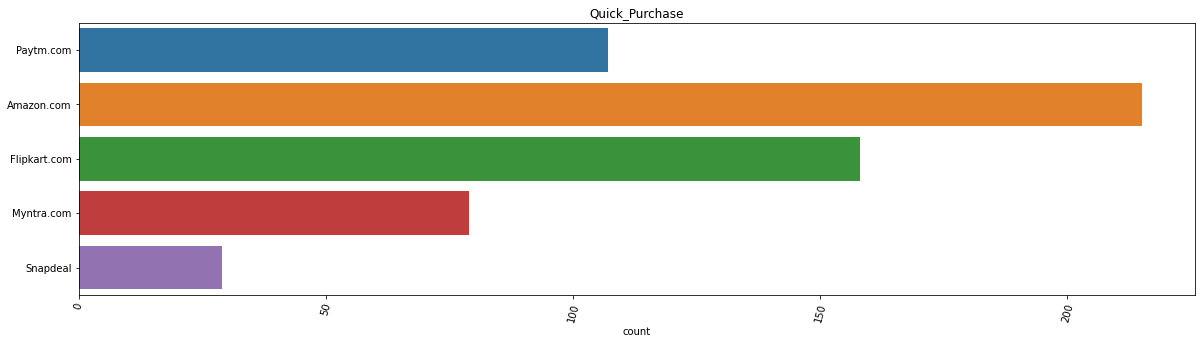

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  PaymentOptions_Availability is : 
 Patym.com        82
Amazon.in       215
Flipkart.com    203
Myntra.com      132
Snapdeal.com     90
dtype: int64


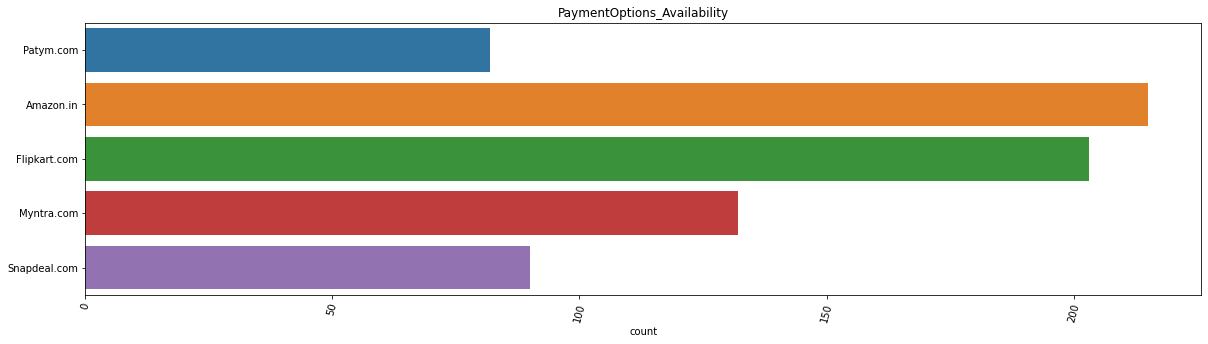

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Fast_Delivery is : 
 Amazon.in       240
Flipkart.com    162
Snapdeal.com     50
Myntra.com       29
dtype: int64


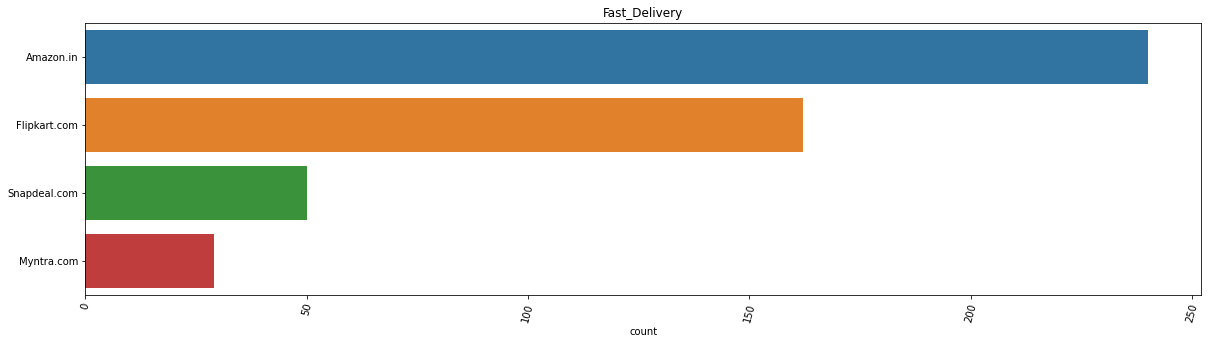

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  CustInfo_Privacy is : 
 Amazon.in       221
Myntra.com       78
Flipkart.com    150
Paytm.com        68
Snapdeal.com     45
dtype: int64


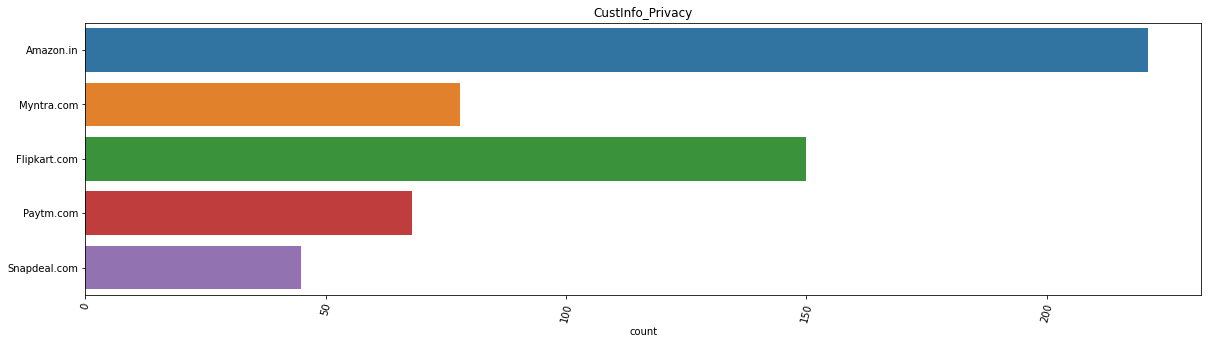

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  FinancialInfo_Security is : 
 Amazon.in       206
Myntra.com       91
Paytm.com        88
Flipkart.com    149
Snapdeal.com    100
dtype: int64


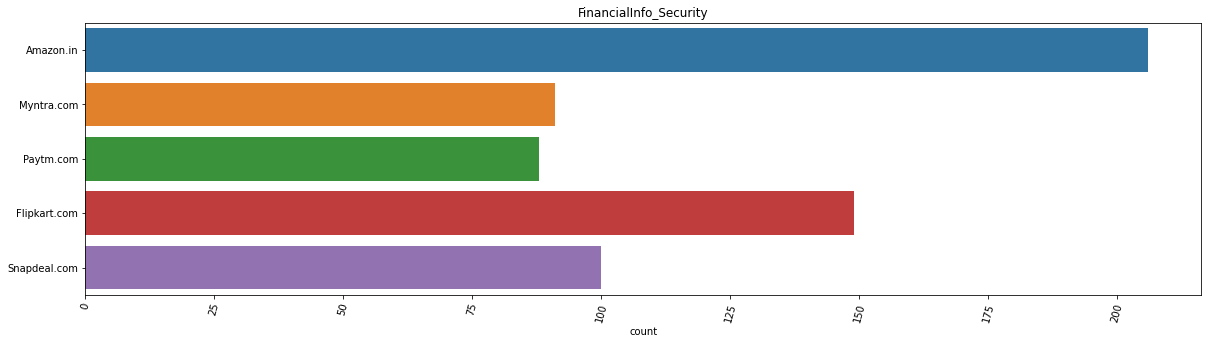

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Perceived_Trustworthiness is : 
 Flipkart.com    143
Myntra.com       88
Amazon.in       227
Snapdeal.com     74
Paytm.com        24
dtype: int64


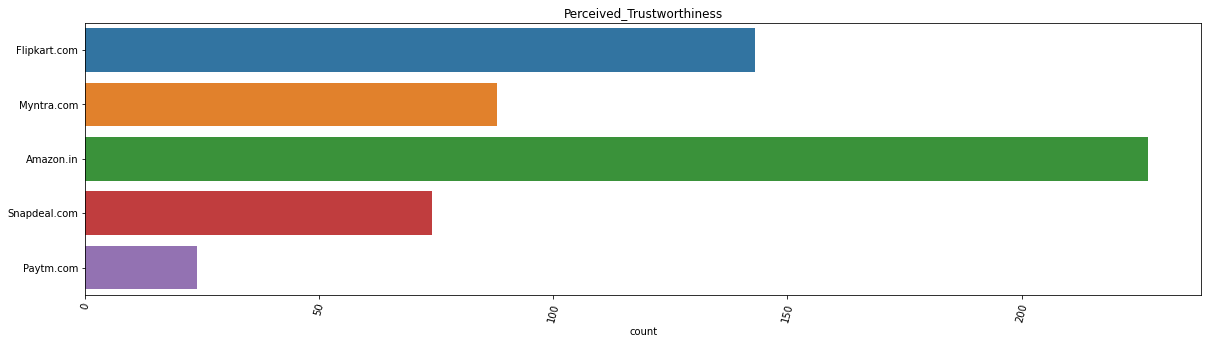

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  MultiChannel_Assistance is : 
 Paytm.com        25
Amazon.in       229
Flipkart.com    136
Myntra.com      111
Snapdeal         87
dtype: int64


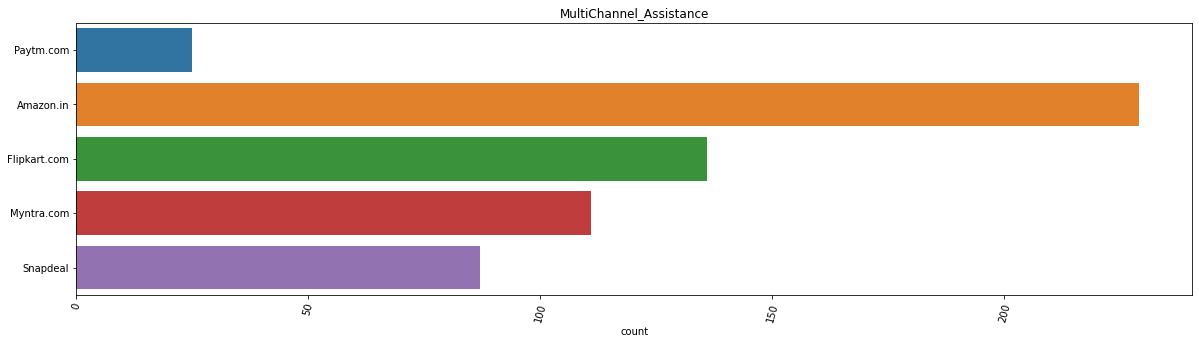

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Long_LoginTime is : 
 Amazon.in       135
Flipkart.com    103
Myntra.com       35
Snapdeal.com     67
Paytm.com        77
dtype: int64


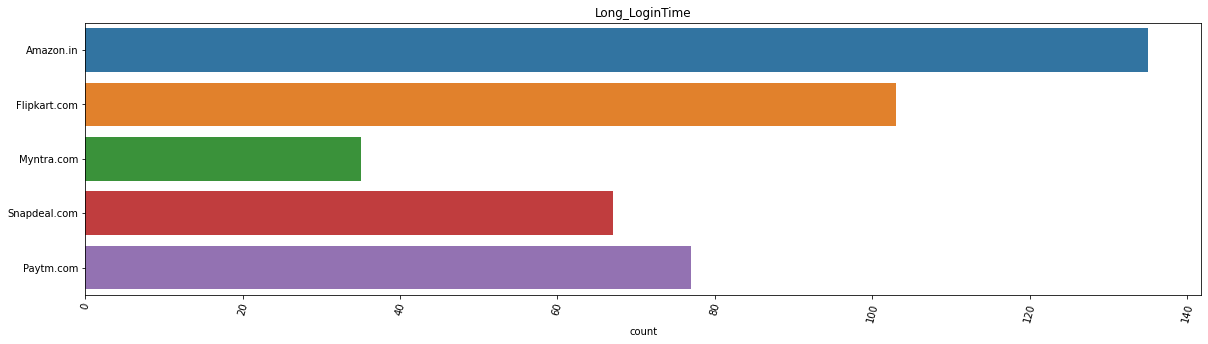

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  LongPhoto_DisplayTime is : 
 Amazon.in       126
Myntra.com       74
Snapdeal.com     92
Paytm.com        28
Flipkart.com     94
dtype: int64


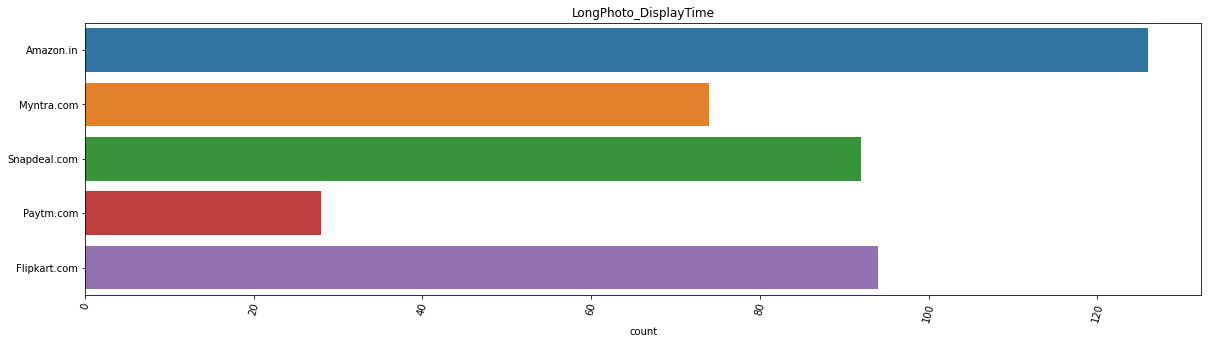

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  LatePrice_Declare is : 
 Flipkart.com    43
snapdeal.com    48
Myntra.com      75
Paytm.com       72
Amazon.in       56
dtype: int64


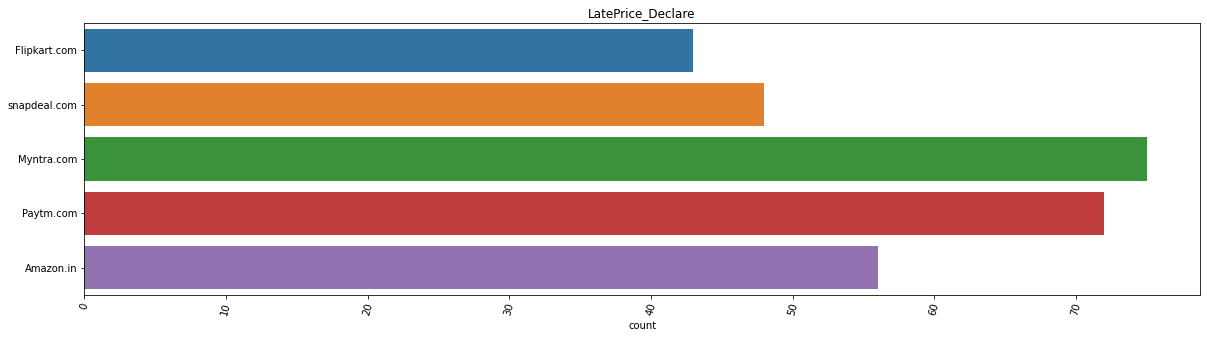

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Long_LoadingTime is : 
 Flipkart.com    61
Snapdeal.com    63
Myntra.com      68
Paytm.com       94
Amazon.in       68
dtype: int64


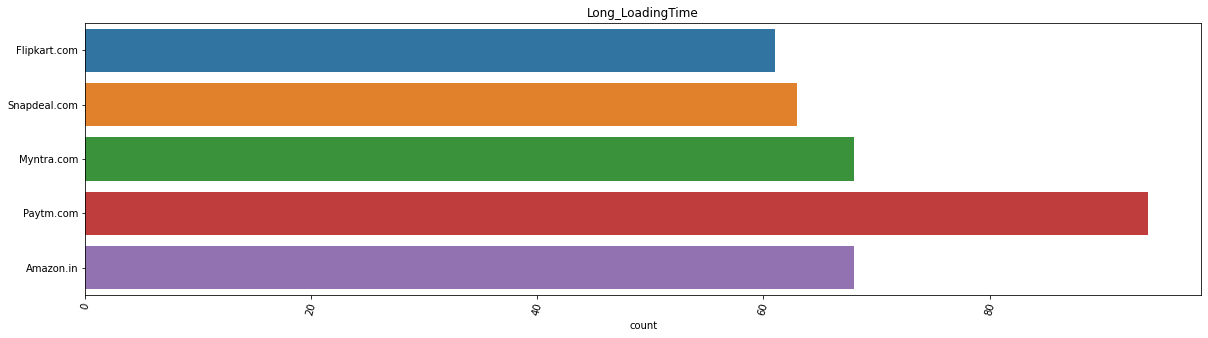

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Limited_PaymentMode is : 
 Amazon.in       104
Snapdeal.com    109
Paytm.com        53
Flipkart.com     60
Myntra.com        7
dtype: int64


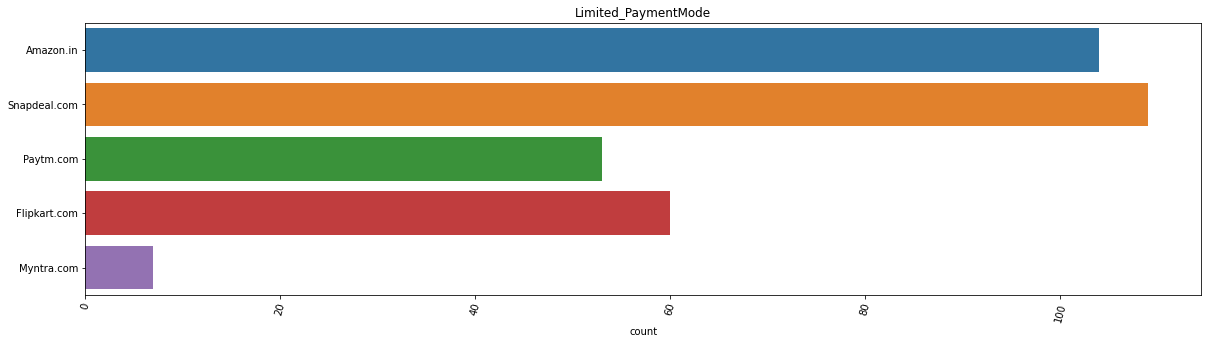

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Late_Delivery is : 
 Paytm.com       98
Snapdeal.com    90
Flipkart.com    44
Amazon.in       37
Myntra.com      26
dtype: int64


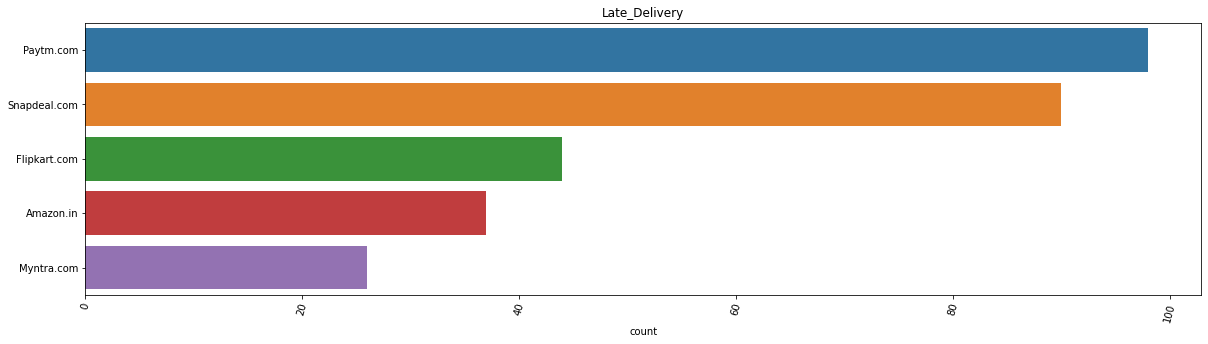

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  ChangeWebApp_Design is : 
 Flipkart.com     72
Amazon.in       141
Paytm.com        63
Myntra.com       37
Snapdeal.com      8
dtype: int64


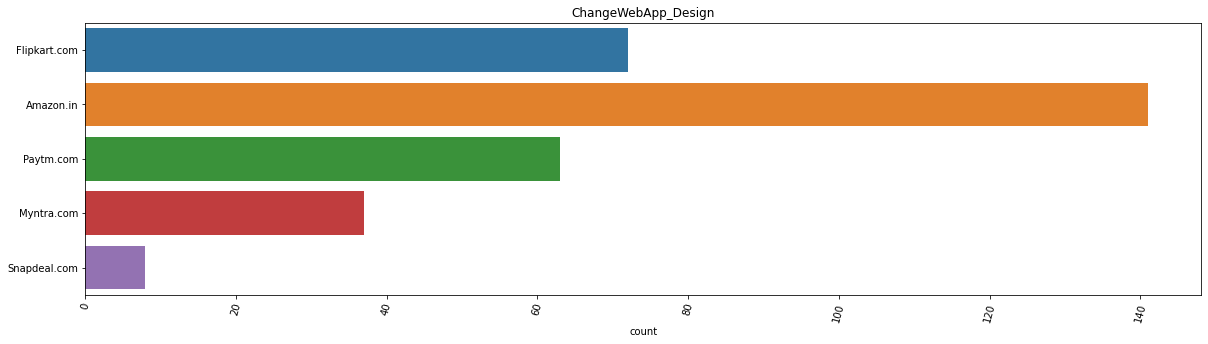

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Page_Disruption is : 
 Amazon.in       78
Myntra.com      66
Paytm.com       39
Flipkart.com    62
Snapdeal.com    74
dtype: int64


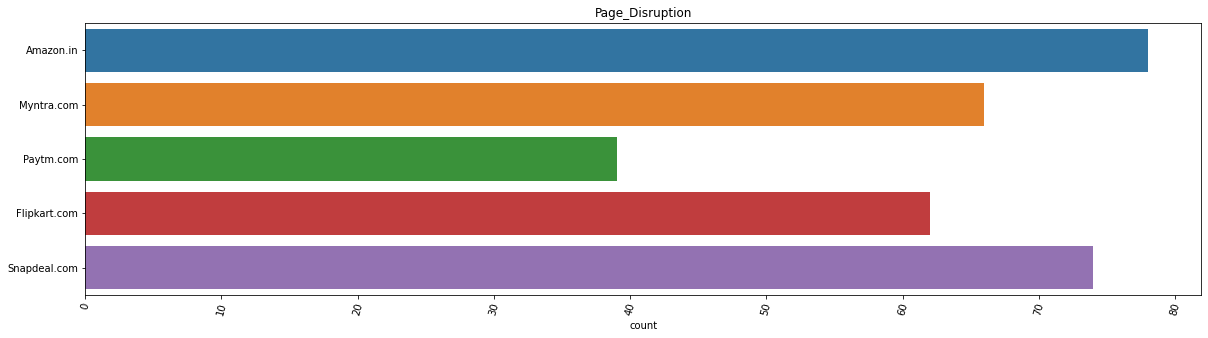

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  WebApp_Efficiency is : 
 Amazon.in       182
Flipkart.com    117
Paytm.com        58
Snapdeal.com     25
Myntra.com       14
dtype: int64


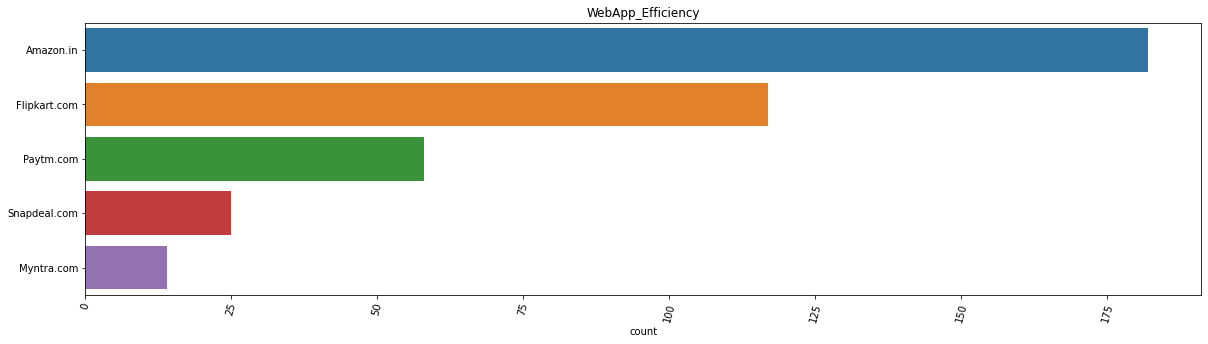

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************
Total Count of each unique values for survey  Recommendation is : 
 Flipkart.com    127
Amazon.in       219
Myntra.com       76
Paytm.com        44
snapdeal.com     11
dtype: int64


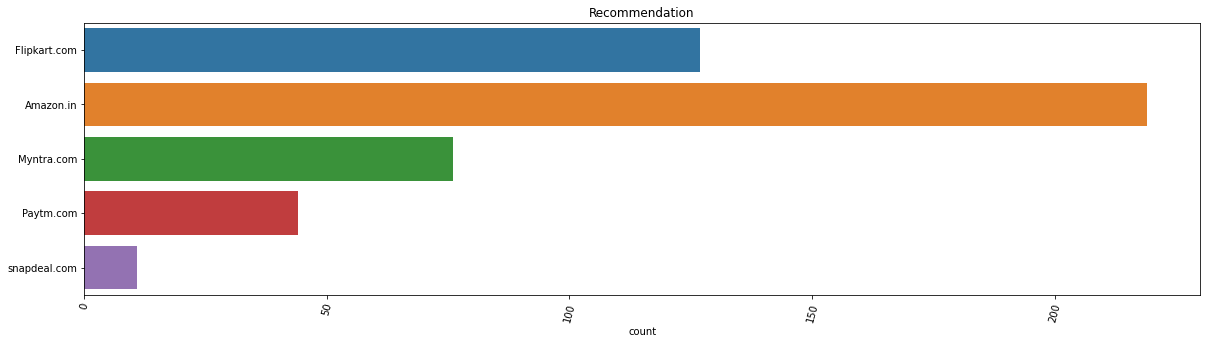

***************************************************************************************************************************
***************************************************************************************************************************
***************************************************************************************************************************


In [18]:
for i in data_hedontic.columns:
    options=[]
    for idx,value in data_hedontic[i].iteritems():
        for option in value.split(','):
            options.append(option)
    print("Total Count of each unique values for survey " , i , "is : \n" ,split_multicolumn(data_hedontic[i]).sum())
    plt.figure(figsize=(20,5))
    sns.countplot(y=pd.Series(options))
    plt.xticks(rotation=75)
    plt.title(i)
    plt.show()
    print("***"*41)
    print("***"*41)
    print("***"*41)

#### Inferences from analysing Hedontic values

Following are the surveys done about customer prefence of ecommerce platforms again different parameters,for each parameter
customer has an option of selecting multiple platforms which they feel fit into the survey question.

Multiple inputs from each customers have been split and combined and total count of each platform against every question is
segregated to understand the exact preferred eCommerce platform among customers


> Shopping From : 
* Amazon wins out among the most preferred shopping sites followed by flipkart. 
  order: 
    * Amazon
    * Flipkart
    * Snapdeal
    * Paytm
    * Myntra
* Paytm can improve and it is normal for myntra to be at last considering major portion of sale is only garments


> Easy to use website or application :
* Customers rated Amazon to be the platform with easy to use interface followed by Flipkart.Paytm and snapdeal was selected 
  in low numbers in survey.
  
> Visually Appealing Web Application:
* Clearly in this area also amazon is on top with flipkart occupying the second spot. here there is a visible difference 
   between flipkart and amazon unlike earlier parameter.
* Paytm and snapdeal have been voted as least visually appealing web application

> Product Variety , Complete information about product 
* Amazon has been consistent in almost all they survey questions followed by flipkart closely.
* Paytm , snapdeal and myntra have been voted with least product variety

> Fast loading website speed of website and application , Reliability of Web application
* Amazon is rated with a website which loads fast
* Flipkart has been second but there is considerate difference between first and second place
* Paytm is third and very low compared to amazon
* snapdeal and myntra are rated least in terms of fast loading of website  and reliability of web application

> Quick purchase - least time taken to complete the purchase
* Amazon is rated with a website takes least time for purchase to be completed
* Flipkart has been second but there is considerate difference between first and second place
* Paytm is third and very low compared to amazon , closely followed by myntra
* Very few people agreed to survey that snapdeal takes less time for purchase completion

> Availability of payment options
* Amazon recieved the maximum votes on availability of multiple payment options


> Fastest Delivery
* Amazon recieves the highest number of votes for very short delivery times
* Flipkart is second follows amazon
* Myntra is voted the least in terms of fastest delivery. 
* Suprisingly there are no votes for paytm.

> Cutomer Info privacy
* Majority of surveyors feel amazon gives more importance for privacy of customer information
* Flipkart follows amazon and snap deal recieved least votes in survey

> Financial Information security
* Majority of surveyors feel amazon gives more importance for financial information of customers ,Flipkart follows amazon 
* Contrary to customer infor privacy, here snapdeal recieved good votes and very few people feel flipkart and myntra give
  security to customers financial information
  
> Multichannel asssitance
* Multichannel assitance is one of the crucial parameters in terms of customer support
* Amazon recieved thums up from many customers in terms of multichannel assitance
* Flipkart received the second highest votes but is very behind in terms of number of votes on comparision to amazon
* Very minute number of people felt paytm has multichannel assitance and is voted the least

> Late price display
* Late price display is a parameter where the actual price increases with sudden charges, this actual price is shown at
  the end of transaction.
* Again in this scenario similar to above many surveyors voted paytm and as having the habit of declaring the price late
* Flipkart recieved a very positive response from surveyors next followed by snapdeal. in this survey amazon loses its
  place for top contender
  
> Late delivery
* Survey results of late delivery are very much inline with faster delivery results

> Change the web application design
* Though amazon recieved positive reponses in many surveys like easy of access, ease of using website, visually appealing 
  website etc, Amazon received highest votes in survey for change of web application design. many felt amazon needs to
  change the web application design, which is quite interesting considering the other parameter have positive for amazon
* Least votes were given for snapdeal for chane of web application design requirement.

> Webapplication efficiency:
* Amazon received highest votes for web application efficiency followed by flipkart
* paytm,snapdeal, myntra are far behind with Myntra getting least number of votes

## Exploratory Data Analysis Conclusion

On analysis of various factors like demographic , utilitarian and hedontic following are the conclusions 

> Demographic:
* Majority of customer base participated in survey is Female in age group 21-40 Years
  * Age and gender wise product display may fetch more sales in all categories of products

* Majority of the customers have had experience of online shopping for 4 years and it is a very healthy growth ,considering
  this factor it can be said that retention of loyal customers is crucial on comparision to gaining new customers.
  
* Majority of customers prefer using mobile handsets with mobile internet, there is a high number of customers shopping 
  more than 30 times a year.
  * This indicates that customers are habituated and interested in making their day to day purchases like groceries from 
    online platforms, as mobile internet is on phase of expansion, investing more in terms of promotional offers on 
    regular shopping and app usage may increase the sales.
    
* Majority of customers frequently abandon the cart due to availability of better options and offers on other platforms for 
  similar products. 
  * Case to case base offers and periodic reminders for items in card may be pushed to customers in case a product is lying
    idle in cart for more than specific cutoff of time.
    

> Utilitarian:
-- From above analysis of Utilitarian values it is clear that following play major role in customer retention 

-Interface:
* Customers strongly agree to facts that content on website should be easily readable, suggestions of similar products 
  to be displayed and detailed information of product should be provided and should be relevant.
* Navigation to required products plays key role , loading and processing speed of website should be fast and interface of 
  website should be friendly

-Multiple Payment options
* Most customers strongly agree that multiple payment options should be provided, payment process should be made easy ,
  pricing should be transparent and privacy of customers information also plays key role.

-Customer Service
* Almost all customers feel the better the customer service the happier the experience in online shopping is
* Responsiveness and availability of several communication channels (email, online rep, twitter, phone etc.) , Empathy 
  (readiness to assist with queries) towards the customers
  
-Factors influencing the purchase
* Discounts , Cashbacks, flexible EMI options loyoalty programs are factors strongly agreed by customers to induce 
  satisfaction and fun in shopping online
* Quality of products available on website and availability of wide range of products
* Net benefit derived from purchasing online, time saved by purchasing online are also factors agreed to be influencing


> Hedontic: 
-- Top eCommerce sites like Amazon, Flipkart, Paytm, Myntra, Snapdeal have been provided as options in survey for voting 
   against various hedontic values like 
   i) Websites customers shopped from
   ii) Easy of web appplication interface available and web application efficiency
   iii) Is the website visually appealing
   iv) Are wide varieties of products available 
   v) Which websites have complete product info regarding the products they host
   vi) Which platform web application is fast to access
   vii) Reliability of Web application
   Viii) Least time taken to complete the purchase
   ix) Availability of multiple payment options
   x) Websites having Fastest delivery options or late delivery by different platforms
   xi) customer information privacy and financial information security
   xii) Multi channel assitance 
   xiii) Display of price late or sudden updations to price
   xiv) Platforms requirinig change in desing of web application
-- The above are the surveys which are consolidated and let us note the gist of performance of difference eCommerce plat-
   forms on basis of votes given by customers
   
  > Amazon :
       Pros : 
       * Amazon clearly stands out and is most accepted eCommerce platforms almost among all the surveys. Majority of the
         customers have voted for amazon in all the categories. 
       Change required as per survey :
       * Amazon received high number of votes for survey question on which platforms require change in desing of website
       * Late display of price (during special sale) - Amazon has been rated very less and steps may be taken for exact
         display of price at initial stages avoiding sudden surprises.
    Conclusions: Customer retention is very low in amazon considering the positive votes in all categories, a little 
    emphasis on website design and proper price structure will help even more customer satisfaction
    
  > Flipkart :
       Pros :
       * Flipkart has been voted the second most satisfactory web platform in almost all the survey questions
       Change required as per survey : 
       * As per survey no of votes received for flipkart in respect to visually appealing , fast loading of websites ,
         reliability of web application , least time taken for purchase , multiple channel assitance is low when compared
         to the amazon which received highest
       * Improving the customer experience in providing visually appealing and fast loading webpages increases the customer
         satisfaction there by
       * Customer care assitance is a crucial factor for customer retention and satisfaction, necessary modifications can
         be done by providing multiple channel customer support for seamless user experience
        
   > Paytm & snapdeal :
        Changes required as per survey :
        * paytm has recieved very less number of survey votes and hence overall improvement in terms of web interface,
          payment options, time taken for purchase checkout , reliability of website, multiple payment options ,
          availability of wide range of items , multiple channel assitance for customer support
          
   > Myntra :
        Changes required as per survey :
        * Myntra also recieved very less number of votes in all hedontic categories, it may be noted that myntra is 
          exclusive to products related to fashion, clothing and appearal. Hence, availability of wide range of items 
          may not be correct parameter for analysis with peers.
        * Myntra needs overall improvement in terms of web interface, payment options , time taken for faster checkout,
          reliability of website and multiple payment options.